## RQ1

### RQ1.0: Packages and Data

#### Packages:

In [ ]:
pip install git+https://github.com/h2oai/datatable

  Cloning https://github.com/h2oai/datatable to /private/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/pip-req-build-udk4ylqx
  Running command git clone --filter=blob:none --quiet https://github.com/h2oai/datatable /private/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/pip-req-build-udk4ylqx
  Resolved https://github.com/h2oai/datatable to commit 5576deaa3ba0394c01f39437ef3b3686a8566bac
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for datatable: filename=datatable-1.1.0a0+build.1667059021.simonefacchiano-cp310-cp310-macosx_10_9_universal2.whl size=7447668 sha256=305824e74450c52d96181e492e6081ae66afa15dbf4af8a52179ea6006c28092
  Stored in directory: /private/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/pip-ephem-wheel-cache-xgu_ou78/wheels/25/6b/ee/3cbb8627cd5d506b38f2a9f40a70d4dfcd7fb4a4fbf7dc8052
Successfully built datatable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pi

In [ ]:
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
import random
from datatable import dt, f, by

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_13867/3654731628.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


#### Data

In [ ]:
NOTE: since we are working woth very big datasets, we will use datatble to import data in Python beacuse it is a very fast method, and then we will convert it into a pandas object to make it more manageable

In [ ]:
# POSTS
posts_csv = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv')

# GUIDELINES
# In each RQ, you'll need different columns of posts. SO, you will have to select every time the columns you want to use.

# The code to do that is the following (copy and paste it when you need it) :

#columns = ['Names of the columns you need']
#posts = posts_csv[:, columns].to_pandas().dropna()  # dropna() remove ALL the raws where there is at least ONE Nan. Sometimes you will need to specify the row you want to scan.

In [ ]:
# PROFILES
profiles_csv = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_profiles.csv')

#columns2 = ['Names of the columns you need']
#profiles = profiles_csv[:, columns2].to_pandas().dropna()

In [ ]:
# LOCATIONS
locations_csv = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_locations.csv')

#columns3 = ['Names of the columns you need']
#locations = locations_csv[:, columns3].to_pandas().dropna()

### RQ1: Exploratory Data Analysis

Let's Start with an Exploratory Data Analysis. Firts, let's have a quick look to our datasets:

#### POSTS:

In [ ]:
columns = ['numbr_likes', 'number_comments', 'post_type']
posts = posts_csv[:, columns].to_pandas().dropna()

In [ ]:
posts.describe()

,numbr_likes,number_comments,post_type
count,4.271016e+07,4.271016e+07,4.271016e+07
mean,2.835030e+02,7.595308e+00,1.028486e+00
std,6.124611e+03,1.941476e+02,1.720221e-01
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+01,0.000000e+00,1.000000e+00
50%,4.600000e+01,2.000000e+00,1.000000e+00
75%,1.140000e+02,5.000000e+00,1.000000e+00
max,8.822952e+06,4.889530e+05,3.000000e+00


Looking at the table above, it is clear that we are in the presence of outliers. In fact, the 75th percentile and the maximum value for likes and comments are strongly different.

Text(0, 0.5, 'Frequencies')

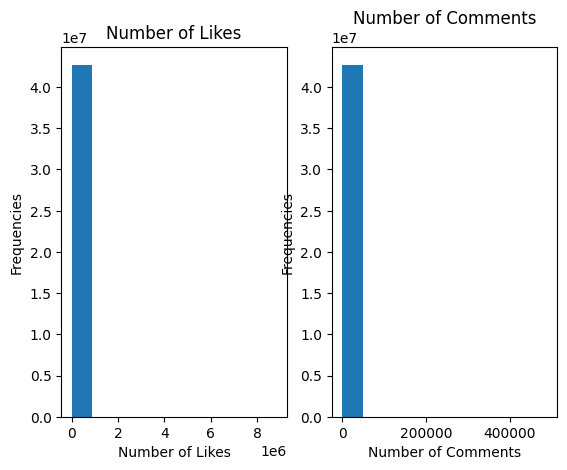

In [ ]:
# For example,
# doing an histogram produces this output for numbr_likes...
from matplotlib.pyplot import xlabel


plt.subplot(1, 2, 1)
plt.hist(posts['numbr_likes'])
plt.title('Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequencies')

plt.subplot(1, 2, 2)
plt.hist(posts['number_comments'])
plt.title('Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequencies')

# which is certainly not useful, due to the marked skewness of the distribution

A valid alternative is to provide a representation by removing the outliers. For example, we can use a box plot, which gives us information about the quartiles of the distribution. 
How to remove outliers? We have to compute the InterQuantile Range (IQR), that is Quartile3 - Quartile1 (Q3 - Q1). The observations that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.

Text(0, 0.5, 'Frequencies')

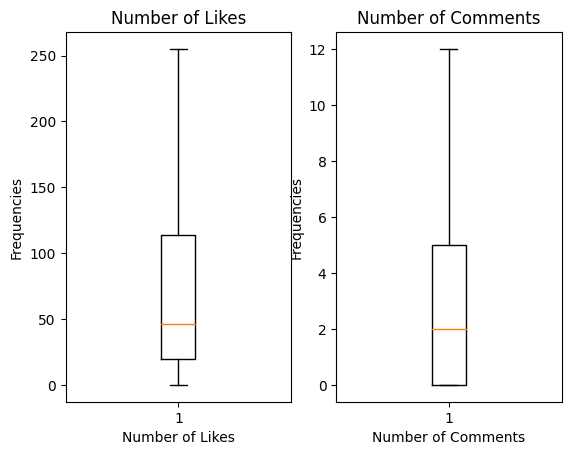

In [ ]:
#We can easily do this operation with the option showfliers = False:

plt.subplot(1, 2, 1)
plt.boxplot(posts['numbr_likes'], showfliers= False)
plt.title('Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequencies')

plt.subplot(1, 2, 2)
plt.boxplot(posts['number_comments'], showfliers= False)
plt.title('Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequencies')

# Also in the boxplot, there is an evident positive skewness.

Instagram gives you the possibility to post various kinds of content, such as photos and videos.
In our dataset the trend is the following:

([<matplotlib.patches.Wedge at 0x16a1eac20>,
 [Text(-1.0961629969607498, 0.09179697213975663, 'Photos'),
  Text(1.0961629910519237, -0.09179704269800942, 'Videos')],
 [Text(-0.5979070892513181, 0.050071075712594525, '97.3%'),
  Text(0.597907086028322, -0.050071114198914225, '2.7%')])

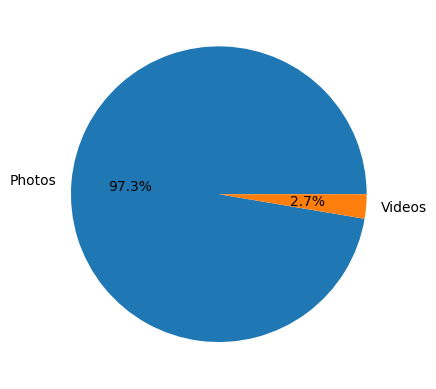

In [ ]:
counts = np.array(posts['post_type'].value_counts())[:2]
labels = ['Photos', 'Videos', 'Multy']
plt.pie(counts, labels = labels[:2], autopct='%.1f%%')

This means the majority of contents on Instagram are photos.
The dataset id referred to 2019, however. In the last year, Instagram has made some big changes to the app as it moved to more videos on the feed, following the steps of Tik Tok.

We also have valuable information regarding profiles:

#### PROFILES

In [ ]:
columns2 = ['profile_id', 'followers', 'following', 'n_posts', 'is_business_account']

profiles = profiles_csv[:, columns2].to_pandas().dropna()

In [ ]:
profiles[['following', 'followers', 'n_posts']].describe()

,following,followers,n_posts
count,3.445323e+06,3.445323e+06,3.445323e+06
mean,1.405733e+03,4.747875e+03,4.096084e+02
std,8.121882e+03,1.941180e+05,1.042270e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,1.590000e+02,2.200000e+01
50%,7.540000e+02,4.060000e+02,1.200000e+02
75%,1.573000e+03,9.740000e+02,4.200000e+02
max,4.191080e+06,2.854576e+08,1.837300e+05


In the next questions, we will explore the relationship between these variables.
For the moment we limit to a simple descriptive analysis.

In the last years social networks have also become an important commercial tool, also thanks to the possibility of using business accounts.
In our dataset, almost the 25% of the accounts were business accounts!

([<matplotlib.patches.Wedge at 0x16a796980>,
 [Text(-0.7821153977760187, 0.7734956396526487, 'Business account'),
  Text(0.7821153977760187, -0.7734956396526489, 'Non-business account')],
 [Text(-0.42660839878691925, 0.42190671253780837, '75.2%'),
  Text(0.42660839878691925, -0.4219067125378084, '24.8%')])

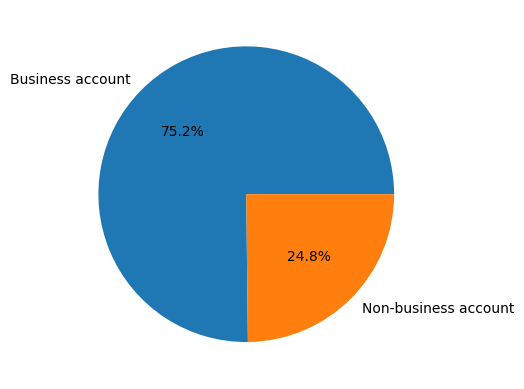

In [ ]:
counts_business = profiles['is_business_account'].value_counts()
labels_business = ['Business account', 'Non-business account']
plt.pie(counts_business, labels = labels_business, autopct='%.1f%%')

We also have some informations about the countries of the users. We can plot the 15 most popular ones inside our dataset: 

#### LOCATIONS

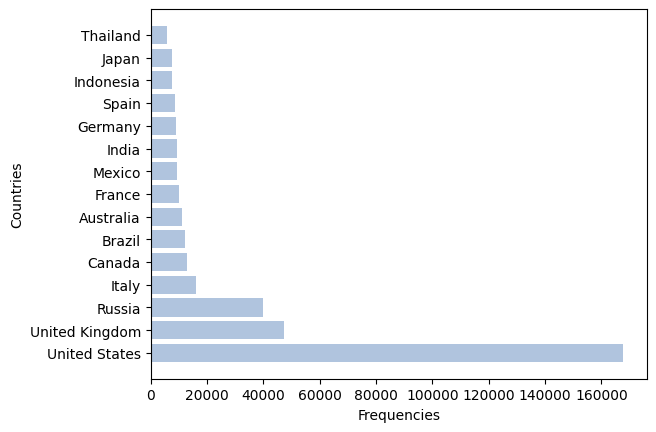

In [ ]:
locations = locations_csv.to_pandas().dropna()

counts = dict(locations['dir_country_name'].value_counts())
countries = list(counts.keys())[1:16]
values = list(counts.values())[1:16]


plt.barh(countries, values, color ='lightsteelblue')
plt.xlabel('Frequencies')
plt.ylabel('Countries') 
plt.show()

## RQ 2

####  Let's explore the dataset by finding simple insights regarding the profile and posts

#### 2.1 Plot the number of posts for each profile in descending order.

##### The Pandas import is performed and the Profiles csv is saved in Parquet

In [ ]:
import pandas as pd

profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

!pip install pyarrow

profiles_df.to_parquet('profiles_df.parquet.snappy')

profiles_df.head(2)


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False


##### Order from highest to lowest with respect to number of posts

In [ ]:
profiles_df.sort_values(by='n_posts', ascending=False, inplace=True)

##### Drop NaN values in n_posts column

In [ ]:
profiles_df = profiles_df[profiles_df["n_posts"].notna()]

##### Drop n_posts that are equal to 0

In [ ]:
profiles_df_without_0 = profiles_df.loc[profiles_df["n_posts"] != 0]

In [ ]:
profiles_df_without_0_filtered = profiles_df_without_0[['profile_name','n_posts']]

##### The DataFrame was transformed to Numpy to be able to plot it.

In [ ]:
profiles_df_without_0_filtered_array = profiles_df_without_0_filtered.to_numpy()

##### Because the DataFrame to be plotted is quite large, LensPy DynamicPlot was used. "LensPy extends Plotly's Dash to allow you to plot very large datasets (millions of points) while ensuring that figures are still fast, fluid, and responsive" https://pypi.org/project/lenspy/

##### LensPy can build dynamic figures of very large datasets without overwhelming the browser when viewing the figures.

##### When the code is run, you can see that it is on the server:

##### " Dash is running on http://127.0.0.1:8050/ "

##### And there we can see that the user with the highest number of posts is jasem3312 with 188.73k posts.
##### You can move the pointer and see each of the profiles with their amount of posts.

<img src= 'Dash_ADM2.png'>

In [ ]:
pip install lenspy

In [ ]:
import numpy as np
import plotly.graph_objects as go
from lenspy import DynamicPlot

x = profiles_df_without_0_filtered_array[:,0]

y = profiles_df_without_0_filtered_array[:,1]

fig = go.Figure(data=[go.Scattergl(x=x, y=y)])

plot = DynamicPlot(fig)
plot.show()




/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/lenspy/__init__.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/lenspy/__init__.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1950

#### 2.2 What posts have the highest number of "likes"?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and numbr_likes

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','numbr_likes']]
    
    df_list.append(filtered)

86it [03:59,  2.78s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_likes"

In [ ]:
from functools import reduce

post_likes = reduce(lambda df1, df2: df1.append(df2), df_list)

post_likes.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/3432768451.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0


##### .nlargest() was used to select the 10 most popular posts based on the number of likes

##### As a result, it is obtained that the post with the highest number of likes is the post_id "Bt3yaXmAM0d" with 8.8M likes.

In [ ]:
top10_post_id = post_likes \
    .nlargest(10, 'numbr_likes')
    
top10_post_id

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0
6293907,BwTSXBKg7gN,3586546.0
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297.0
39812576,Bw2gTH1AiDA,3311246.0


#### 2.3 What posts have the most and the least number of comments?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and number_comments

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','number_comments']]
    
    df_list.append(filtered)

86it [03:28,  2.43s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_comments"

In [ ]:
from functools import reduce

post_comments = reduce(lambda df1, df2: df1.append(df2), df_list)

post_comments.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/3953308785.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,number_comments
0,BXdjjUlgcgq,0.0
1,BVg0pbolYBC,1.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0


##### .nlargest() was used to select the 10 most popular posts based on the number of comments

##### As a result, it is obtained that the post with the highest number of comments is the post_id "Bx2sPAjHviO" with 488k likes.

In [ ]:
top10_comments = post_comments \
    .nlargest(10, 'number_comments')
    
top10_comments

,post_id,number_comments
41873060,Bx2sPAjHviO,488953.0
12164781,BuGjhWAhAW5,313997.0
33261751,BJ-rkpTgn1N,257488.0
11149127,BMtisIxjhtT,214365.0
9383817,BzOOWj3DfZK,189888.0
5427268,BoQoM-JFkPA,180635.0
25257169,Bwarws1lCok,173988.0
6220011,Bt4qlVDAZMH,170836.0
31689573,Bs9NhQkAcJA,166919.0
14257307,Bzqb95QI_1E,166198.0


##### .nsmallest() was used to select the 10 least popular posts based on the number of comments

##### As a result, it is observed that there are many posts with 0 comments.

In [ ]:
least10_comments = post_comments \
    .nsmallest(10, 'number_comments')

least10_comments

,post_id,number_comments
0,BXdjjUlgcgq,0.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0
11,Bx-ptmpinBs,0.0
12,Bx9uKZAAHDg,0.0
13,Bx5qGE0AlMM,0.0
23,Bxf-Vl4lK2S,0.0
24,BxCrxafBm-9,0.0
28,BwRE4lYhQ3r,0.0


#### 2.4 How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and location_id

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','location_id']]
    
    df_list.append(filtered)

86it [03:17,  2.30s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_location_id"

In [ ]:
from functools import reduce

post_location_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_location_id.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/2672636998.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14


##### np.any was used to create the null_location_id column and assign 1 to posts that did not have a location ID and 0 to posts that did.

In [ ]:
post_location_id['null_location_id'] = np.any(post_location_id[post_location_id.columns[1:]].isnull(), axis=1).astype(int)

In [ ]:
post_location_id_tag =post_location_id \
    .groupby(['null_location_id'])  \
    .agg(count=('null_location_id', 'count'))


In [ ]:
post_location_id_tag

,count
null_location_id,
0,29737425
1,12972772


##### plot.pie was used to visualize the result.

##### As can be seen in the graph, 30.4% of the posts do not have a location ID, while 69.6% do have a location ID. Therefore, it is concluded that most Instagram users use the location tag so that their followers can see where they are.

<AxesSubplot:title={'center':'Tag Locations'}, ylabel='count'>

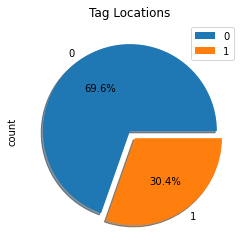

In [ ]:
post_location_id_tag.plot.pie(y='count', title='Tag Locations', \
                         shadow=True, autopct='%1.1f%%', \
                         explode=(0, 0.1), startangle=0)

#### 2.5 How many posts include only photos? How many also have videos?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and post_type

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','post_type']]
    
    df_list.append(filtered)

86it [02:57,  2.07s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_type_id"

In [ ]:
from functools import reduce

post_type_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_type_id.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1110/3773087190.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_type_id = reduce(lambda df1, df2: df1.append(df2), df_list)


,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1


##### It was grouped by type of post and a count was made to know how many were Post type 1 (pictures) and how many were Post type 3 (pictures and videos).

In [ ]:
post_type_id_count =post_type_id \
    .groupby(['post_type'])  \
    .agg(count=('post_type', 'count'))

In [ ]:
post_type_id_count

,count
post_type,
1,41534486
2,1134768
3,40943


##### .plot.pie was used to visualize that 97.2% of posts only have pictures and 0.1% of posts have both, pictures and videos.

<AxesSubplot:title={'center':'Post type'}, ylabel='count'>

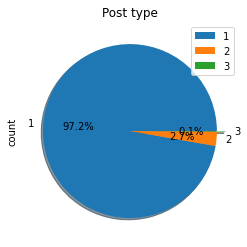

In [ ]:
post_type_id_count.plot.pie(y='count', title='Post type', \
                    shadow=True, autopct='%1.1f%%', \
                    explode=(0, 0, 0.1), startangle=0)

#### 2.6 What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

##### The columns of interest were saved in a DataFrame

In [ ]:
business_account = profiles_df[['profile_id','is_business_account']]

##### A group by was made for the column and its values and a count

In [ ]:
business_account_count =business_account  \
    .groupby(['is_business_account'])  \
    .agg(count=('is_business_account', 'count'))

##### .plot.pie was used to visualize that 24.8% of the accounts are business accounts. Therefore, it can be said that a very high percentage is used by companies to carry out marketing and advertising campaigns.

<AxesSubplot:title={'center':'Is Business Account?'}, ylabel='count'>

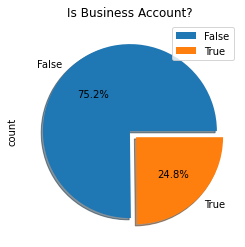

In [ ]:
business_account_count.plot.pie(y='count', title='Is Business Account?', \
                    shadow=True, autopct='%1.1f%%', \
                    explode=(0, 0.1), startangle=0)

# RQ3



**1. What is the most common time in which users publish their posts?**


**2. Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.**


**3. Use the function that you created in the previous literal to plot the number of posts between the following time intervals:**


||Initial Time|Final Time|
|---|---|---|
| 1 | 06:00:00 | 10:59:59 |
| 2 | 11:00:00 |  13:59:59|
| 3 | 14:00:00 |  16:59:59|
| 4 | 17:00:00 |  19:59:59|
| 5 | 20:00:00 | 23:59:59|
| 6 | 00:00:00 | 02:59:59|
| 7 | 03:00:00 | 05:59:59|
|...|||

In [ ]:

import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

## 3.1 

In [ ]:
posts =  pd.read_csv("instagram_posts.zip",delimiter="\t",usecols=["post_id", "cts"])#Increase up to len of dataframe

**Body of 3.1**

In [ ]:
posts.isna().sum()
posts.dropna()

,post_id,cts
0,BXdjjUlgcgq,2017-08-06 20:06:57.000
1,BVg0pbolYBC,2017-06-19 09:31:16.000
2,BRgkjcXFp3Q,2017-03-11 20:05:03.000
3,BKTKeNhjEA7,2016-09-13 16:27:16.000
4,8-NQrvoYLX,2015-10-18 10:19:27.000
...,...,...
42710192,BcpWMWGBfxh,2017-12-13 15:38:04.000
42710193,Ba6LZWwlCl8,2017-10-31 11:28:01.000
42710194,BPN0kM1hYUw,2017-01-13 20:16:37.000
42710195,BxsZ8nDBr-L,2019-05-20 20:07:52.000


**Convert to datetime and keeping only the hour:minute:second**

In [ ]:
posts['cts'] = pd.to_datetime(posts.cts).dt.time

**STEP 1: Selecting only cts and post_id columns**


**STEP 2: Counting each row grouped by cts**

In [ ]:
counter = posts.groupby('cts').post_id.count()

In [ ]:
counter

cts
00:00:00    470
00:00:01    570
00:00:02    538
00:00:03    555
00:00:04    565
           ... 
23:59:55    496
23:59:56    487
23:59:57    488
23:59:58    469
23:59:59    491
Name: post_id, Length: 86400, dtype: int64

**Calculating Maximum count of post**

In [ ]:
maximum  = max(counter)
print(maximum)
result =  counter[counter == maximum]


928


**Returning the cts value corresponding to the maximum**

In [ ]:
output  = str(result).replace("\n"," ")

output  = output[4:12]
print("The most common time in which users publish their posts is: ")
output

The most common time in which users publish their posts is: 


'21:00:09'

## 3.2

**time_interval(time_list,posts) takes as input a list of time intervals = time_list which its elements is a list of two datetime.time object. This two datetime.time objects delimit the interval.
The second input is the posts_dataframe.
Please use posts_cts_manager to cast every entries in posts_dataframe['cts'] column in the right object type(datatime.time)**

In [ ]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if( type(time[0])== type(date) and time[0]<= date and time[1]>=date):
                counter[interval] += 1
    plt.figure(figsize=(10,10))
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g',width=.3)
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

## 3.3


**The code counts the number of posts published in each time interval given as input and plots the frequencies
in a histogram**

**The code calls time_interval function written above**


Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


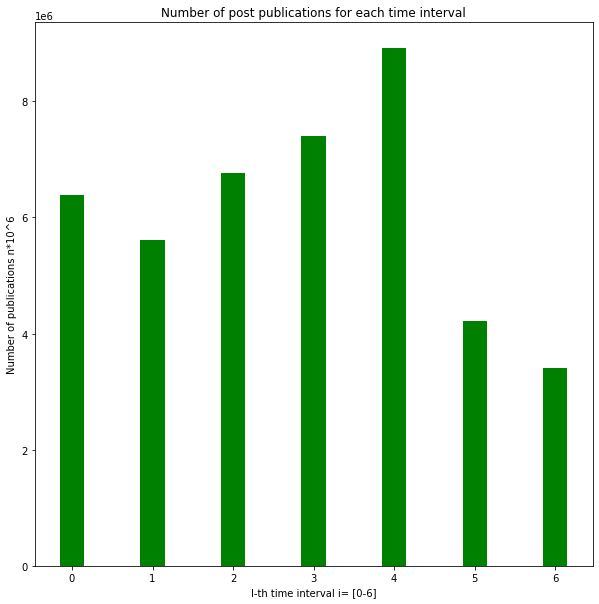

In [ ]:
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.title("Number of post publications for each time interval")
plt.ylabel("Number of publications n*10^6")
plt.xlabel("I-th time interval i= [0-6]")
plt.show()

**Users have the tendency to post more in the time interval between 20-00 than in every other time interval we gave as input to the make the plot. Also the most common time in which users publish a post falls inside the time interval with the most publications.**

**In fact there are more that 8 million publications in the time between 20-00.**

### FREE MEMORY

In [1]:
del posts

NameError: name 'posts' is not defined

# RQ4

**In most cases, we will not have a __consistent dataset__, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.**

   **1. Write a function that, given a profile_id, will be able to return the posts that belong to the given *profile_id*.**
   
   **2. Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the *profile.csv* using the previously written function.**
     
   **3. What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in *profile.csv*?**
    
   **4. Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.**


In [ ]:
import pandas as pd
import numpy as np
import random
import logging
import datatable as dt
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

## 4.1

**Function which returns all the post published by the account with id = profile_id that are present in the posts_dataframe**

In [ ]:
def find_posts_byId(profile_id,posts_dataframe):
    return posts_dataframe[posts_dataframe.profile_id == profile_id]

**TEST**

In [ ]:
#For the entire dataframe:
    # posts_datatable = dt.fread("~/Downloads/instagram_posts.zip",sep='\t')
posts_dataframe =  pd.read_csv("instagram_posts.zip",delimiter="\t",usecols=['post_id','profile_id','cts','numbr_likes','number_comments'])

In [ ]:
profile_dataframe = pd.read_csv("instagram_profiles.zip",delimiter="\t")

**Random profile_id from dataset**

In [ ]:
print(posts_dataframe.shape[0])

42710197


In [ ]:
id1 = posts_dataframe.profile_id[random.randint(0,posts_dataframe.shape[0])]
id1
id2 = 623386236.0

**Function that execute find_posts_byId and checks for errors in the output**

In [ ]:
def check_test(profile_id,posts_dataframe):
    correct  = posts_dataframe[posts_dataframe.profile_id == np.float64(profile_id)].shape[0]
    test = find_posts_byId(profile_id,posts_dataframe)
    if(test.shape[0] == correct) :
        print("Function find_posts_byId is working")
    else:
        print("Function find_posts_byId is incorrect")

In [ ]:
check_test(id1,posts_dataframe)
check_test(id2,posts_dataframe)

Function find_posts_byId is working
Function find_posts_byId is working


## 4.2

In [ ]:
def posts_top_profiles(n,posts_dataframe,profile_dataframe):
    top_posted_profiles = profile_dataframe.sort_values('n_posts',ascending=False).profile_id.head(n+1)    
    output_posts = []
    for id in top_posted_profiles:
        output_posts.append(find_posts_byId(id,posts_dataframe))
    result = pd.concat(output_posts)
    return result
    

**TEST**

In [ ]:
top_posted_profiles = profile_dataframe.sort_values('n_posts',ascending=False).profile_id.head(11)    
print(top_posted_profiles)
display(posts_top_profiles(10,posts_dataframe,profile_dataframe))

3990313    1.996648e+08
2571453    8.563367e+09
4338921    1.273455e+09
3942129    9.813508e+06
4219642    1.607309e+09
2207897    1.087614e+09
4313908    1.603890e+09
4219476    2.181730e+08
4236057    2.855497e+08
1631526    8.312603e+09
4219551    1.701679e+09
Name: profile_id, dtype: float64


,post_id,profile_id,cts,numbr_likes,number_comments
9592952,Bq3hP3Khp8J,1.996648e+08,2018-12-02 03:03:33.000,0.0,0.0
9592953,Bq3hN53hUsD,1.996648e+08,2018-12-02 03:03:17.000,0.0,0.0
9592954,BCqCe9LypeF,1.996648e+08,2016-03-07 16:28:50.000,27.0,0.0
9592955,20Wu4zypd2,1.996648e+08,2015-05-18 11:21:27.000,28.0,0.0
9592956,BrKq76AhadU,1.996648e+08,2018-12-09 13:33:47.000,1.0,0.0
...,...,...,...,...,...
40437904,BxT74jSH25K,1.701679e+09,2019-05-11 08:03:24.000,0.0,0.0
40996459,BxzVSO6hq2V,1.701679e+09,2019-05-23 06:41:49.000,1.0,0.0
41291564,BxrFpFzBquO,1.701679e+09,2019-05-20 07:51:12.000,1.0,0.0
42357392,BxwWhDXh9-v,1.701679e+09,2019-05-22 08:54:51.000,1.0,0.0


## 4.3

**Collect all the posts published by the top 10 profiles who posted more**

In [ ]:
averages = posts_top_profiles(10,posts_dataframe,profile_dataframe)

**Compute the average number of likes and comments for each profile  who is in the top 10 profiles with the most number of posts**

In [ ]:
averages.groupby("profile_id")[['numbr_likes','number_comments']].mean()  

,numbr_likes,number_comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
1.701679e+09,1.447368,0.000000


## 4.4

**Functions written in the RQ3 file**

In [ ]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if(type(time[0])== type(date) and time[0]<= date and time[1]>=date):
                counter[interval] += 1
    plt.figure(figsize=(10,10))
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the quantity of post publications for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

**Pass the time intervals as input of  time_interval() function**

In [ ]:
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)

**Execute time_interval function with the input built in the cell above on the posts of the top10 profiles with the most number of posts**

In [ ]:
target_posts = posts_top_profiles(10,posts_dataframe,profile_dataframe)   
display(target_posts)

,post_id,profile_id,cts,numbr_likes,number_comments
9592952,Bq3hP3Khp8J,1.996648e+08,03:03:33,0.0,0.0
9592953,Bq3hN53hUsD,1.996648e+08,03:03:17,0.0,0.0
9592954,BCqCe9LypeF,1.996648e+08,16:28:50,27.0,0.0
9592955,20Wu4zypd2,1.996648e+08,11:21:27,28.0,0.0
9592956,BrKq76AhadU,1.996648e+08,13:33:47,1.0,0.0
...,...,...,...,...,...
40437904,BxT74jSH25K,1.701679e+09,08:03:24,0.0,0.0
40996459,BxzVSO6hq2V,1.701679e+09,06:41:49,1.0,0.0
41291564,BxrFpFzBquO,1.701679e+09,07:51:12,1.0,0.0
42357392,BxwWhDXh9-v,1.701679e+09,08:54:51,1.0,0.0


In [ ]:
#execute this cell ONLY ONCE if target_posts have just been loaded in the file
#posts_cts_manager(target_posts)

Histogram with the quantity of post publications for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


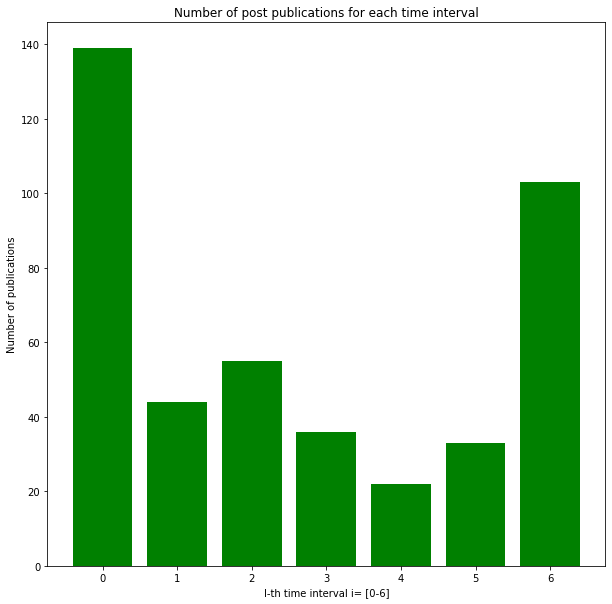

In [ ]:
time_interval(time_list,target_posts)
plt.title("Number of post publications for each time interval")
plt.ylabel("Number of publications")
plt.xlabel("I-th time interval i= [0-6]")
plt.show()

### CONCLUSION
The plot shows us that the top10 profiles prefer to post in the time that goes from 6 am to 11 am.
This result can't give a general conclusion on the preferred time in which users publish their posts. Beacuse this result is not the same as the one considering all the other profiles, since the result obtained may be influenced by the publication times of a single profile.

### FREE MEMORY

In [ ]:
del posts_dataframe
del profile_dataframe
del target_posts

NameError: name 'posts_dataframe' is not defined

# RQ 5

#### The most influential users are the ones with the highest number of “followers", you can now look more into their activity

##### The Pandas import is performed and the Profiles csv is saved in Parquet

In [ ]:
import pandas as pd

profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

!pip install pyarrow

profiles_df.to_parquet('profiles_df.parquet.snappy')

profiles_df.head(2)


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False


#### 5.1 Plot the top 10 most popular users in terms of followers and their number of posts.

##### The dataframe was organized to only obtain the necessary columns. .nlargest() was used to select the 10 most popular usersbased on followers

In [ ]:
top10 = profiles_df[['profile_id', 'profile_name', 'followers', 'n_posts']] \
    .nlargest(10, 'followers')
    
top10

,profile_id,profile_name,followers,n_posts
2880218,2.502532e+07,instagram,285457645.0,5760.0
2582507,3.416684e+06,victoriassecret,65269440.0,7355.0
3820939,2.082449e+07,nba,35339708.0,28816.0
701965,1.876191e+08,louisvuitton,30689316.0,3352.0
2414951,2.125507e+09,buzzfeedtasty,30246783.0,2791.0
2785241,4.968651e+08,andresiniesta8,29542143.0,990.0
333193,2.341008e+07,hm,29176804.0,4566.0
3934581,2.423993e+07,princessyahrini,29042823.0,4719.0
1311970,5.041706e+07,danbilzerian,26476004.0,1311.0
1703764,9.070254e+08,akshaykumar,26252169.0,1173.0


##### pd.plot() and the subplot attribute were used to get the top 10 most popular users in terms of number of posts and followers. Subplot was used because the scale of y values ​​differed by a large number and therefore it was not possible to correctly represent both attributes in the same plot.

##### More props at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

array([<AxesSubplot:title={'center':'n_posts'}, xlabel='profile_name'>,
       <AxesSubplot:title={'center':'followers'}, xlabel='profile_name'>],
      dtype=object)

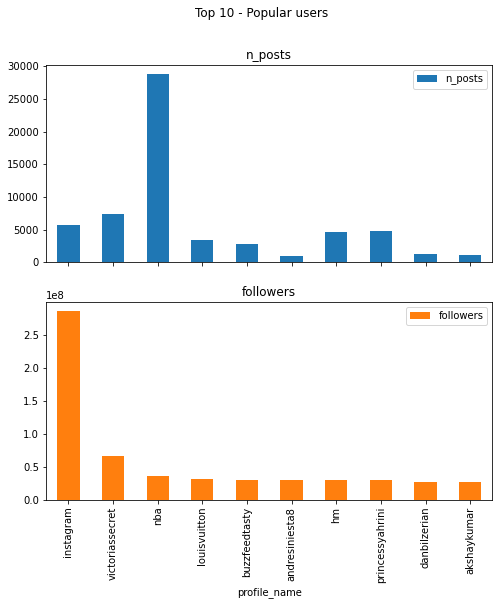

In [ ]:
top10.plot(x='profile_name', y=['n_posts', 'followers'], kind='bar', subplots=True, 
           title='Top 10 - Popular users', figsize=(8, 8)) # , layout=(1, 2), sharey=True)

#### 5.2 Who is the most influential user?

##### Assuming that the most influential user is the one with the largest number of followers, the "Instagram" user is the most influential as it has 285M followers with 5.7K posts.

In [ ]:
top10.head(1)

,profile_id,profile_name,followers,n_posts
2880218,25025320.0,instagram,285457645.0,5760.0


#### 5.3 Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

##### .astype('int32') was used to convert the "profile_id" column format to integers.

In [ ]:

selected_profile_ids = top10.profile_id.astype('int32').to_list()

##### Through the for loop and the established chunksize, we search for all the posts that are related to the 10 most influential profiles.

In [ ]:
from tqdm import tqdm

posts_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[chunk.profile_id.isin(selected_profile_ids)]
    
    posts_list.append(filtered)


86it [04:03,  2.83s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "posts_df"

In [ ]:
from functools import reduce

posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)

posts_df.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from p

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
266570,28641534,336492,Ss3ULFBQeM,25025320.0,5.332856e+06,2012-12-01 17:42:03.000,1,"On December 1st, 1955, in Montgomery, Alabama ...",125428.0,1240.0
659635,29042650,336492,BeECzRuh1O6,25025320.0,5.873874e+08,2018-01-17 20:59:30.000,1,Photo by @jameswhitlowdelano\nAfter traveling ...,669786.0,4818.0
1441841,29834978,336492,Brl3hGMAxiy,25025320.0,8.770667e+14,2018-12-20 03:03:13.000,1,Photo by @overrated_outcast\nOne word you can’...,1914299.0,20065.0
1559527,29952957,337097,BFrYARaRh55,20824486.0,6.294880e+05,2016-05-21 19:30:19.000,1,Who else is hoopin' today?,164521.0,1415.0
2410579,30815147,336492,BZNHb3ijnDT,25025320.0,3.500213e+08,2017-09-19 03:56:12.000,1,Photo by @keepingwiththetimes\nA cheerful burs...,840588.0,3627.0


##### A backup CSV file is saved

In [ ]:
posts_df.to_parquet('posts_df.parquet.snappy')
posts_df.to_csv('posts_df.csv')

posts_top10_df = posts_df

##### A "groupby" by Profile ID and Location ID is made to find out how many different Location IDs were used per profile. Therefore, the answer to the question is: 91 different tag locations were used by the 10 most popular profiles.

In [ ]:
locations_posts_count = posts_top10_df \
    .groupby(['profile_id', 'location_id'], dropna=True) \
    .agg(count=('post_id', 'count'))
    
locations_posts_count.reset_index(inplace=True)

locations_posts_count = locations_posts_count \
    .astype({'profile_id' : 'int64', 'location_id' : 'int64', 'count' : 'int32'})

locations_posts_count

,profile_id,location_id,count
0,3416684,262606339,1
1,3416684,116531305845344,1
2,3416684,189331311669042,1
3,3416684,252960988517436,1
4,3416684,302612476852048,1
...,...,...,...
87,496865116,179370,1
88,496865116,366902078,3
89,496865116,2019565374753966,1
90,907025384,1653066228336077,1


##### The base "posts_top10_df_location" is prepared to later perform a merge and find the most visited areas and cities according to the ID Location.

In [ ]:
locations_df = pd.read_csv('instagram_locations.csv', delimiter='\t')

posts_top10_df_location = posts_top10_df[['post_id','profile_id','location_id']]
posts_top10_df_location = posts_top10_df_location.dropna()

posts_top10_df_location = posts_top10_df_location \
    .astype({'profile_id' : 'int64', 'location_id' : 'int64'})

posts_top10_df_location    

,post_id,profile_id,location_id
266570,Ss3ULFBQeM,25025320,5332856
659635,BeECzRuh1O6,25025320,587387369
1441841,Brl3hGMAxiy,25025320,877066659067597
1559527,BFrYARaRh55,20824486,629488
2410579,BZNHb3ijnDT,25025320,350021298
...,...,...,...
41532427,BswHrnTB2HN,25025320,838523900
41608204,Bi7wE8uBWNI,25025320,1011688667
41874115,rdbaZkRhzl,20824486,244021299
42211393,Bf4WZMdljVZ,20824486,433604130


##### pd.merge() was used to merge the CSV Instagram Locations using the Location ID.

In [ ]:
location_post_area = pd.merge(left=posts_top10_df_location, right=locations_df, left_on='location_id', right_on='id')
location_post_area

,post_id,profile_id,location_id,sid,id,name,street,zip,city,region,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,Ss3ULFBQeM,25025320,5332856,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
1,BeECzRuh1O6,25025320,587387369,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
2,Brl3hGMAxiy,25025320,877066659067597,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
3,BFrYARaRh55,20824486,629488,808150,629488,David Crombie Park,131 The Esplanade,M5A 4P5,"Toronto, Ontario",NaN,...,Saint Lawrence,saint-lawrence,CA,Canada,-79.368635,43.648486,NaN,david-crombie-park,http://www1.toronto.ca/parks/prd/facilities/co...,2019-06-01 19:46:51.479
4,BZNHb3ijnDT,25025320,350021298,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,BswHrnTB2HN,25025320,838523900,709981,838523900,Stanislaus National Forest,NaN,NaN,"Lodi, California",NaN,...,NaN,NaN,NaN,NaN,-121.291619,38.139407,NaN,stanislaus-national-forest,http://www.fs.usda.gov/main/stanislaus/home,2019-05-28 14:07:28.559
101,Bi7wE8uBWNI,25025320,1011688667,712659,1011688667,Leuser Ecosystem,Leuser,NaN,"Blangpidi, Aceh, Indonesia",NaN,...,NaN,NaN,NaN,NaN,96.847161,3.743398,NaN,leuser-ecosystem,http://leuserecosystem.org,2019-05-28 17:05:17.449
102,rdbaZkRhzl,20824486,244021299,722170,244021299,InfoCision Stadium–Summa Field,427 Nash St,44304,"Akron, Ohio",NaN,...,NaN,NaN,NaN,NaN,-81.508443,41.072518,NaN,infocision-stadiumsumma-field,http://www.gozips.com/athletics/facilities/Inf...,2019-05-29 03:39:14.795
103,Bf4WZMdljVZ,20824486,433604130,734424,433604130,The Toyta Center,1510 Polk St,77010,"Houston, Texas",NaN,...,Downtown Houston,downtown-houston,US,United States,-95.362071,29.750773,NaN,the-toyta-center,www.houstontoyotacenter.com,2019-05-29 16:21:10.297


##### The most frequent areas are obtained by a "groupby" using the Location Name and a counter used in the post_id. The most visited areas by the 10 most popular influencers are Sydney, Australia and Victoria's Secret.

In [ ]:
locations_frequent_area = location_post_area \
    .groupby(['name']) \
    .agg(count=('post_id', 'count'))
    
locations_frequent_area.reset_index(inplace=True)

locations_frequent_area.nlargest(10, 'count')

,name,count
70,"Sydney, Australia",9
80,Victoria's Secret,4
37,"Kobe-shi, Hyogo, Japan",3
9,Bel-Air Estate,2
11,"Bora Bora, French Polynesia",2
81,Wells Fargo Center,2
0,666 Fifth Avenue,1
1,ARIA Poker Room,1
2,AZULIK Tulum,1
3,Amsterdam Forest,1


##### To obtain the plot of visits by city, a "groupby" is first made by city and a post_id counter. Then, the cities are sorted in descending order using a pd.sort_values ​​with respect to the number of visits. Finally, pd.plot() was used to obtain the plot shown below.

<AxesSubplot:title={'center':'Cities visited'}, xlabel='City', ylabel='Number of times visited'>

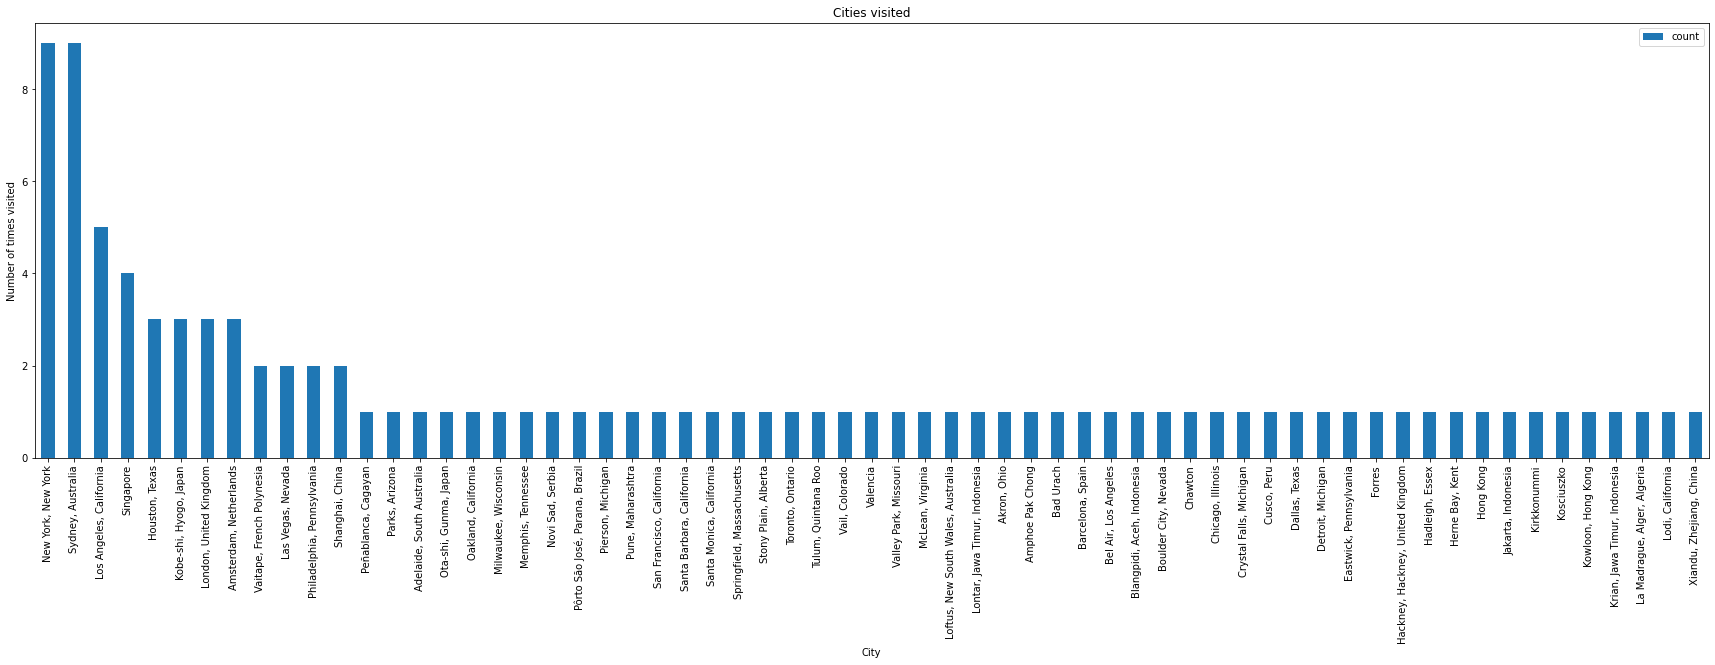

In [ ]:
#Count on City

locations_city_count =location_post_area \
    .groupby(['city'], dropna=True) \
    .agg(count=('post_id', 'count'))

locations_city_count.reset_index(inplace=True)

#Order from highest to lowest with respect to visits
locations_city_count.sort_values(by='count', ascending=False, inplace=True)

#Plot each time city has been visit 
locations_city_count.plot(x='city', y='count', kind='bar', 
           title='Cities visited', figsize=(30, 8),
           xlabel='City', ylabel='Number of times visited')


#### 5.4 How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

##### A "groupby" was used per post_type and a counter of the post_id was used to calculate the total number of post types. Then, a pd.plot.pie was used and through the "autopct" attribute the option to show the percentage was enabled. From the final result, it can be concluded that 90.8% of the posts made by the 10 most influential people contain only pictures and 9.2% contain only videos. There is no post that contains both post types together. Therefore, it can be inferred that the world population prefers to use platforms like Instagram to post mostly photos and leave other apps to watch videos.



<AxesSubplot:title={'center':'Post Types'}, ylabel='count'>

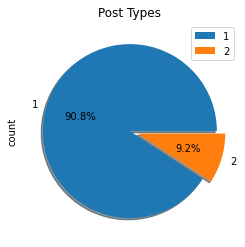

In [ ]:
#Pictures Only - Post type = 1
#Videos Only - Post type = 2
#Both - Post type =3
post_type_count =posts_top10_df \
    .groupby(['post_type']) \
    .agg(count=('post_id', 'count'))

post_type_count.plot.pie(y='count', title='Post Types', \
                         shadow=True, autopct='%1.1f%%', \
                         explode=(0, 0.1), startangle=0)

### 5.5 How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

##### To answer the first question, a "group by" per type of post is used and then the number of likes and comments obtained by each type of post is added.

##### It can be concluded that posts that only contain pictures have a higher number of acceptance and interactions with followers. Post type 1 has 69M likes vs. Post type 2 has 3M likes, obtaining a ratio of 95.8% against 4.2%. 
##### Regarding the comments, Post type 1 has approximately 500k comments vs. Post type 2 that has 26k, obtaining a ratio of 95.6% vs 4.4%. Thus maintaining the ratio obtained in the previous analysis.


In [ ]:
#Number of likes and comments per post_type
post_type_landc =posts_top10_df \
    .groupby(['post_type']) \
    .agg(sum_likes=('numbr_likes', 'sum'), sum_comments=('number_comments', 'sum'))

post_type_landc


,sum_likes,sum_comments
post_type,,
1,69285634.0,497013.0
2,3464814.0,26258.0


##### A pd.merge() was used to fetch the number of followers using the profile_id key.

In [ ]:
#Join posts and profile
followers_likes_posts = pd.merge(left=posts_top10_df, right=top10, left_on='profile_id', right_on='profile_id')


##### A .groupby() was used for profile_name and post_type along with the calculation of the average number of likes and comments and the number of followers per profile. Finally, the final DataFrame is ordered by the number of followers in descending order.

##### The final result shows what was previously analyzed. The number of likes is much higher than the number of comments on all the 10 most popular profiles.

##### It is also evident that, with the exception of the "Instragram" profile, there is no direct relationship between the number of likes and comments along with the number of followers. For example, "andresiniesta8" has fewer followers compared to the profile "victoriassecret" and still has on average a higher number of likes on their comments and videos.

In [ ]:
#Average number of likes and comments per post_type per top 10 user
post_type_landc =followers_likes_posts \
    .groupby(['profile_name','post_type']) \
    .agg(mean_likes=('numbr_likes', 'mean'), mean_comments=('number_comments', 'mean'), followers=('followers','mean'))

post_type_landc.reset_index(inplace=True)

post_type_landc  = post_type_landc  \
    .astype({'mean_likes' : 'int64','mean_comments' : 'int64','followers': 'int64'})

post_type_landc.sort_values(by='followers', ascending= False)

,profile_name,post_type,mean_likes,mean_comments,followers
5,instagram,1,905933,6703,285457645
6,instagram,2,593409,5749,285457645
12,victoriassecret,1,230749,438,65269440
13,victoriassecret,2,261408,583,65269440
8,nba,1,242235,1087,35339708
9,nba,2,207295,1026,35339708
7,louisvuitton,1,186857,867,30689316
2,buzzfeedtasty,1,100862,963,30246783
1,andresiniesta8,1,473022,2237,29542143
4,hm,1,81213,365,29176804


# RQ6

#### It's time to get information from the user posting effectiveness.

#### 6.1 What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

##### Through the for loop and the established chunksize, we select only the columns of interest: profile_id and cts

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['profile_id','cts']]
    
    df_list.append(filtered)

86it [03:12,  2.24s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_dt_by_profile_id"

In [ ]:
from functools import reduce

post_dt_by_profile_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_dt_by_profile_id.head(5)

,profile_id,cts
0,2.237948e+09,2017-08-06 20:06:57.000
1,5.579335e+09,2017-06-19 09:31:16.000
2,3.134296e+08,2017-03-11 20:05:03.000
3,1.837593e+09,2016-09-13 16:27:16.000
4,1.131527e+09,2015-10-18 10:19:27.000


##### A backup CSV file is saved

In [ ]:
post_dt_by_profile_id.to_csv('post_dt_by_profile_id.csv')

post_dt_by_profile_id = pd.read_csv('post_dt_by_profile_id.csv', header=0, index_col=0)

##### A window operation was performed to obtain the time delta that a user had between one operation and another.

##### A count was made to find out how many posts had been made per user and the DataFrame was restricted to analyze the average time between posts only for users who had made more than one post.

In [ ]:
post_dt_by_profile_id.cts = pd.to_datetime(post_dt_by_profile_id.cts)

#Window operation 
post_dt_by_profile_id["_previous_time"] = ( 
    post_dt_by_profile_id.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

post_dt_by_profile_id["_count_cts"] = post_dt_by_profile_id.groupby("profile_id")["cts"].transform("count")

post_dt_by_profile_id = post_dt_by_profile_id[post_dt_by_profile_id["_count_cts"] > 1].reset_index()

post_dt_by_profile_id["delta_time"] = post_dt_by_profile_id["cts"] - post_dt_by_profile_id["_previous_time"]

##### The columns of interest are saved in the DataFrame, the NaT values ​​are eliminated and we convert the DataFrame to Int64

In [ ]:
post_dt_by_profile_id = post_dt_by_profile_id[['profile_id','delta_time']]

post_dt_by_profile_id = post_dt_by_profile_id[post_dt_by_profile_id["delta_time"].notna()]

post_dt_by_profile_id = post_dt_by_profile_id.astype('int64')

##### The average time that passes between posts was calculated using .mean() after a groupby per profile_id

In [ ]:
post_dt_by_profile_id_mean = post_dt_by_profile_id \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

##### The 3 people with the shortest average time were selected.

In [ ]:
post_dt_by_profile_id_mean = post_dt_by_profile_id_mean.nsmallest(3,'mean')

#Use to have the mean time in Days.
post_dt_by_profile_id_mean = post_dt_by_profile_id_mean.astype({'profile_id':'int64', 'mean': 'timedelta64[ns]'})

post_dt_by_profile_id_mean

,profile_id,mean
125819,8801686,0.0
160364,11534437,0.0
256203,19420666,0.0


##### To verify why there are 3 users with an average of 0, a filter was made of all the posts that these users made.

In [ ]:
top_3_smallest_mean = post_dt_by_profile_id_mean.profile_id.astype('int32').to_list()

from tqdm import tqdm

posts_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[chunk.profile_id.isin(top_3_smallest_mean)]
    
    posts_list.append(filtered)

86it [04:04,  2.84s/it]


##### As you can see, these 3 people made 2 different posts (they have different post IDs) at the same time. Therefore, they are the top 3 people with the lowest average between posts.

In [ ]:
from functools import reduce

top_3_smallest_mean_posts = reduce(lambda df1, df2: df1.append(df2), posts_list)



In [ ]:
top_3_smallest_mean_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
8777270,37101699,156474,BnfClvhHN1WDJjKC_arIKYTniDzomnufr0qJRM0,8801686.0,2.049153e+14,2018-09-09 02:19:42.000,1,Saltountastic,46.0,3.0
31198194,15778261,156474,BnfClvhHN1W,8801686.0,2.049153e+14,2018-09-09 02:19:42.000,1,Saltountastic,46.0,3.0
39888507,25490420,-1,BvM-wR9lSUB,19420666.0,8.559840e+06,2019-03-19 21:11:01.000,1,She has the best big brother 💗,21.0,0.0
39888508,25490422,-1,BvM-wRnllHV,19420666.0,8.559840e+06,2019-03-19 21:11:01.000,1,“Angels are often disguised as daughters” - un...,21.0,0.0
42142328,27785492,-1,Msn7GmxVvS,11534437.0,2.176185e+07,2012-07-05 13:19:11.000,1,NaN,0.0,0.0
42142453,27785493,-1,Msn6-9xVvR,11534437.0,2.176185e+07,2012-07-05 13:19:11.000,1,NaN,0.0,0.0


##### The Data Frame Profiles was brought to obtain the number of followers and following.

In [ ]:
profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

profiles_df = profiles_df[profiles_df["profile_id"].notna()]

profiles_df = profiles_df.astype({'profile_id':'int64'})

In [ ]:
post_dt_by_profile_id_mean

,profile_id,mean
125819,8801686,0.0
160364,11534437,0.0
256203,19420666,0.0


##### A pd.merge() was used to fetch the number of followers using the profile_id key.

In [ ]:
#Join posts and profile
followers_following_top3 = pd.merge(left=post_dt_by_profile_id_mean, right=profiles_df, left_on='profile_id', right_on='profile_id')

##### As stated above, there are inconsistencies between the databases, so it only matched a profile ID belonging to Alex Dinsdale with 705 followers and 1572 following.

##### The number of n_posts is also ignored due to inconsistencies found between databases.

In [ ]:
followers_following_top3 = followers_following_top3[['profile_id','mean','followers','following']]
followers_following_top3

,profile_id,mean,followers,following
0,8801686,0.0,705.0,1572.0


##### According to experts, it is recommended to make 3 posts a week to have an active profile on Instagram: https://www.iprofesional.com/actualidad/330966-instagram-revela-su-secreto-cuantas-veces-debes-postear-al-dia

##### A year has 52.14 weeks. Doing the multiplication, this is equivalent to 156 publications per year. Taking into account that Instagram was created in 2010 and the base was extracted in 2019, by multiplying 156 by 9, we have 1,404 posts. Therefore, a better analysis would have been to look at the average number of posts from users who have at least 1,404 posts in these 9 years. It should be noted that the results would not have been entirely correct because the databases present inconsistencies.

#### 6.2 Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

##### Through the for loop and the established chunksize, we select only the columns of interest: profile_id and cts

In [ ]:
import pandas as pd
from tqdm import tqdm

likesandcomments_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['numbr_likes','number_comments','cts']]
    
    likesandcomments_list.append(filtered)

86it [12:01,  8.38s/it] 


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_dt_by_profile_id"

In [ ]:
from functools import reduce

likesandcomments_df = reduce(lambda df1, df2: df1.append(df2), likesandcomments_list)

likesandcomments_df.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1230/1804233208.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  likesandcomments_df = reduce(lambda df1, df2: df1.append(df2), likesandcomments_list)


,numbr_likes,number_comments,cts
0,80.0,0.0,2017-08-06 20:06:57.000
1,25.0,1.0,2017-06-19 09:31:16.000
2,9.0,0.0,2017-03-11 20:05:03.000
3,4.0,0.0,2016-09-13 16:27:16.000
4,8.0,0.0,2015-10-18 10:19:27.000


##### A backup CSV file is saved

In [ ]:
#Save a copy of the DF of interest

likesandcomments_df.to_csv('likesandcomments_df.csv')

likesandcomments_df = pd.read_csv('likesandcomments_df.csv', header=0, index_col=0)

#### The function from point 3 was used to convert the "cts" column to a datetime

In [ ]:
#Function used in RQ3
def posts_cts_manager(post_dataframe):
    post_dataframe['cts'] = pd.to_datetime(post_dataframe.cts).dt.time
    return post_dataframe#

likesandcomments_df = posts_cts_manager(likesandcomments_df)
likesandcomments_df.dtypes

numbr_likes        float64
number_comments    float64
cts                 object
dtype: object

##### All null values ​​that are in the cts column are removed.

In [ ]:
likesandcomments_df.dropna(inplace = True, subset = ['cts'])

##### Two DataFrame are created, one for the number of likes and another for the number of comments, both related to cts.

In [ ]:
#DataFrime for the Number of Likes
likes_df = likesandcomments_df[['numbr_likes','cts']]

#DataFrime for the Number of Comments
comments_df = likesandcomments_df[['number_comments','cts']]

##### .hour was used to extract only the hour from the cts column and save it to a new one (_hour)

In [ ]:
likes_df['_hour'] = likes_df.cts.apply(lambda i: i.hour).astype(int)
likes_df

,numbr_likes,cts,_hour
0,80.0,20:06:57,20
1,25.0,09:31:16,9
2,9.0,20:05:03,20
3,4.0,16:27:16,16
4,8.0,10:19:27,10
...,...,...,...
42710192,74.0,15:38:04,15
42710193,49.0,11:28:01,11
42710194,18.0,20:16:37,20
42710195,27.0,20:07:52,20


##### We define the predefined intervals in point 3 in the "intervals" list.

##### Some changes were made to the function that was made in RQ3 since it works perfectly to count the number of posts but to perform operations it is not efficient.

In [ ]:
intervals = [0, 3, 6, 11, 14, 17, 20, 24]

##### Used pd.cut() function to segment and sort data values ​​into bins (time intervals)

##### The execution time is lower, so it's evident that it's more efficient to use pandas for databases than loops.

In [ ]:
likes_df['_bin'] = pd.cut(likes_df['_hour'], intervals, include_lowest=True, right=False)

likes_df

,numbr_likes,cts,_hour,_bin
0,80.0,20:06:57,20,"[20, 24)"
1,25.0,09:31:16,9,"[6, 11)"
2,9.0,20:05:03,20,"[20, 24)"
3,4.0,16:27:16,16,"[14, 17)"
4,8.0,10:19:27,10,"[6, 11)"
...,...,...,...,...
42710192,74.0,15:38:04,15,"[14, 17)"
42710193,49.0,11:28:01,11,"[11, 14)"
42710194,18.0,20:16:37,20,"[20, 24)"
42710195,27.0,20:07:52,20,"[20, 24)"


##### We perform a group by by _bin and add the number of likes to find out which is the interval with the highest number of likes.

In [ ]:
result_group_by_likes = likes_df \
    .groupby(['_bin'])[['numbr_likes']] \
    .sum() \
    .reset_index()

result_group_by_likes = result_group_by_likes \
    .astype({'numbr_likes' : 'int64'})

result_group_by_likes

,_bin,numbr_likes
0,"[0, 3)",1132228305
1,"[3, 6)",906307766
2,"[6, 11)",1714755026
3,"[11, 14)",1655934971
4,"[14, 17)",2008428995
5,"[17, 20)",2228425199
6,"[20, 24)",2461097190


##### Each interval has 4 hours, therefore the total sum obtained previously is divided into 4 to obtain the average

In [ ]:
#Average of Likes
result_group_by_likes['average_of_likes_per_interval']=result_group_by_likes['numbr_likes']/4

result_group_by_likes = result_group_by_likes \
    .astype({'average_of_likes_per_interval' : 'int64'})

result_group_by_likes

,_bin,numbr_likes,average_of_likes_per_interval
0,"[0, 3)",1132228305,283057076
1,"[3, 6)",906307766,226576941
2,"[6, 11)",1714755026,428688756
3,"[11, 14)",1655934971,413983742
4,"[14, 17)",2008428995,502107248
5,"[17, 20)",2228425199,557106299
6,"[20, 24)",2461097190,615274297


##### The DataFrame was transformed to Numpy to be able to plot it.

In [ ]:
result_group_by_likes_values = result_group_by_likes[['_bin','average_of_likes_per_interval']].astype(str)
 
result_group_by_likes_values_array = result_group_by_likes_values.to_numpy().tolist()

In [ ]:
result_group_by_likes_values_array

[['[0, 3)', '283057076'],
 ['[3, 6)', '226576941'],
 ['[6, 11)', '428688756'],
 ['[11, 14)', '413983742'],
 ['[14, 17)', '502107248'],
 ['[17, 20)', '557106299'],
 ['[20, 24)', '615274297']]

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

##### The function carried out in point 3 was slightly modified in order to continue using dictionaries and their attributes in the creation of the histogram.

In [ ]:
#Function used in RQ3
def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0

    for _bin, value in posts:
        if _bin == '[0, 3)':
            counter['00:00:00 02:59:59'] = value
        elif _bin == '[3, 6)':
            counter['03:00:00 05:59:59'] = value 
        elif _bin == '[6, 11)':
            counter['06:00:00 10:59:59'] = value 
        elif _bin == '[11, 14)':
            counter['11:00:00 13:59:59'] = value 
        elif _bin == '[14, 17)':
            counter['14:00:00 16:59:59'] = value 
        elif _bin == '[17, 20)':
            counter['17:00:00 19:59:59'] = value 
        elif _bin == '[20, 24)':
            counter['20:00:00 23:59:59'] = value 
    for key in counter:
        counter[key] = int(counter[key])
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the avergae quantity of number of likes for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1

##### In the histogram we can see that the interval that has the highest number of likes is interval 4 from 8:00 p.m. to 12:00 a.m with an average of 615M likes per hour

Digit 1 to insert custom input, other char will execute code with default


Histogram with the avergae quantity of number of likes for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


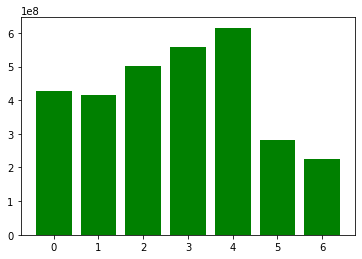

In [ ]:
posts = result_group_by_likes_values_array

#Function used in RQ3
print("Digit 1 to insert custom input, other char will execute code with default")
if(input() ==  str(1)):
    print("\n")
    input_t = [] 
    print("Write number of intervals:")
    n = int(input())
    print("Insert "+str(n)+" time intervals: (example: 06:00:00 10:59:59)")
    for i in range(n):
        print("Interval #",i)
        input_t.append(list(input().split()))
else:
    print("\n")
    input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.show()

##### The same process is repeated but with number of comments:

In [ ]:
comments_df['_hour'] = comments_df.cts.apply(lambda i: i.hour).astype(int)
comments_df

,number_comments,cts,_hour
0,0.0,20:06:57,20
1,1.0,09:31:16,9
2,0.0,20:05:03,20
3,0.0,16:27:16,16
4,0.0,10:19:27,10
...,...,...,...
42710192,0.0,15:38:04,15
42710193,0.0,11:28:01,11
42710194,0.0,20:16:37,20
42710195,1.0,20:07:52,20


In [ ]:
comments_df['_bin'] = pd.cut(comments_df['_hour'], intervals, include_lowest=True, right=False)
comments_df

,number_comments,cts,_hour,_bin
0,0.0,20:06:57,20,"[20, 24)"
1,1.0,09:31:16,9,"[6, 11)"
2,0.0,20:05:03,20,"[20, 24)"
3,0.0,16:27:16,16,"[14, 17)"
4,0.0,10:19:27,10,"[6, 11)"
...,...,...,...,...
42710192,0.0,15:38:04,15,"[14, 17)"
42710193,0.0,11:28:01,11,"[11, 14)"
42710194,0.0,20:16:37,20,"[20, 24)"
42710195,1.0,20:07:52,20,"[20, 24)"


In [ ]:
result_group_by_comments = comments_df \
    .groupby(['_bin'])[['number_comments']] \
    .sum() \
    .reset_index()

result_group_by_comments = result_group_by_comments \
    .astype({'number_comments' : 'int64'})

result_group_by_comments

,_bin,number_comments
0,"[0, 3)",32027925
1,"[3, 6)",23870239
2,"[6, 11)",46784338
3,"[11, 14)",43755376
4,"[14, 17)",52081094
5,"[17, 20)",59538096
6,"[20, 24)",66302700


In [ ]:
#Average of comments
result_group_by_comments['average_of_comments_per_hour']=result_group_by_comments['number_comments']/4

result_group_by_comments = result_group_by_comments \
    .astype({'average_of_comments_per_hour' : 'int64'})

In [ ]:
result_group_by_comments_values = result_group_by_comments[['_bin','average_of_comments_per_hour']].astype(str)
 
result_group_by_comments_values_array = result_group_by_comments_values.to_numpy().tolist()

result_group_by_comments_values_array

[['[0, 3)', '8006981'],
 ['[3, 6)', '5967559'],
 ['[6, 11)', '11696084'],
 ['[11, 14)', '10938844'],
 ['[14, 17)', '13020273'],
 ['[17, 20)', '14884524'],
 ['[20, 24)', '16575675']]

In [ ]:
#Function used in RQ3
def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0

    for _bin, value in posts:
        if _bin == '[0, 3)':
            counter['00:00:00 02:59:59'] = value
        elif _bin == '[3, 6)':
            counter['03:00:00 05:59:59'] = value 
        elif _bin == '[6, 11)':
            counter['06:00:00 10:59:59'] = value 
        elif _bin == '[11, 14)':
            counter['11:00:00 13:59:59'] = value 
        elif _bin == '[14, 17)':
            counter['14:00:00 16:59:59'] = value 
        elif _bin == '[17, 20)':
            counter['17:00:00 19:59:59'] = value 
        elif _bin == '[20, 24)':
            counter['20:00:00 23:59:59'] = value 
    for key in counter:
        counter[key] = int(counter[key])
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the avergae quantity of number of likes for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1

##### As can be seen in the histogram, interval 4 is the one that obtains the highest number of comments as well as the highest number of likes.

Digit 1 to insert custom input, other char will execute code with default


Histogram with the avergae quantity of number of likes for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


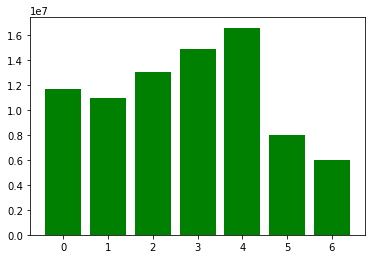

In [ ]:
posts = result_group_by_comments_values_array

#Function used in RQ3
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.show()

# RQ7

Dealing with probabilities inside big-size datasets is not an easy task.
In fact, by applying the classic definition of probability, i.e. favorable cases divided by possible cases, we risk running into very long execution times.
On the one hand, therefore, the statistician must decide whether to base himself on a one-point estimate (precise, but possibly affected by "sample effects") or on an interval estimate (based on the creation of subsamples which provide confidence intervals).
In this question we will refer to the first possibility only, that is, we will calculate the ratio between favorable and possible cases.


### RQ7.1

Basic idea of RQ7.1: in order to compute the ratio between 'favorable cases' and 'possible cases', we create a binary variable: we assign 1 if the post gets more than 20% "likes" of the number of followers a user has, 0 otherwise.

In [ ]:
# First, merge the two datasets 'posts' and 'profiles'

columns = ['profile_id', 'numbr_likes']
posts = posts_csv[:, columns].to_pandas().dropna()

columns2 = ['profile_id', 'followers']
profiles = profiles_csv[:, columns2].to_pandas().dropna()

data = pd.merge(posts, profiles, on = "profile_id")

data.shape

(24708644, 3)

In [ ]:
# Second, we create the binary variable '20%'

data['20%'] = data.apply(lambda x :  (x.numbr_likes + 1 )/ (x.followers + 1), axis = 1 ) > 0.20

In [ ]:
# Third: we compute the probability as the ratio between favorable cases and possible cases

N = len(data)
X = sum(data['20%'])

prob = round(X/N * 100, 2)

print('The probability computed as favorable cases/ possible cases is', prob, '%')


# Note that dropping or not dropping NAs could lead to slightly different approximations.

The probability computed as favorable cases/ possible cases is 16.35 %


We also have another option: bootstrapping.
The problem is that it is too slow, and the result we obtain weìhen try to reduce the time will never be accurate.

I report the code here below:

In [ ]:
#profiles2 --> profile_id, followers
#lst=[] 
#for i in tqdm(range(500)):
#  random_id= random.sample(list(posts['profile_id']), 500)
#  sample = posts[posts['profile_id'].isin(random_id)].reset_index(drop=True)
  
#  data=pd.merge(sample, profiles2, on = "profile_id")
#  lst.append(sum(data.apply(lambda x :  (x.numbr_likes + 1 )/ (x.followers +1), axis = 1 ) > 0.20)/ data.shape[0])

### RQ7.2

Similar appproac to RQ7.1.

In [ ]:
# First, we group by profile_id to know the times a user visited (posted) the same place

columns = ['profile_id', 'location_id']
posts = posts_csv[:, columns].to_pandas().dropna()

posts_groups = posts.groupby(['profile_id', 'location_id']).size().reset_index(name='counts')
posts_groups

,profile_id,location_id,counts
0,3.000000e+00,1.000000e+01,1
1,3.000000e+00,5.400000e+01,1
2,3.000000e+00,8.030000e+02,1
3,3.000000e+00,1.526200e+04,1
4,3.000000e+00,2.705200e+04,1
...,...,...,...
21096130,9.001013e+13,6.631216e+14,1
21096131,9.001013e+13,2.075964e+14,1
21096132,9.001013e+13,1.855425e+14,2
21096133,9.001013e+13,2.418404e+08,1


Then we search on the favorable cases, m, and divide by M, that is the number of possible cases.

In [ ]:
m = len(posts_groups[posts_groups['counts'] > 1])
M = len(posts_groups)

# Finally we compute the probability

prob2 = m/M
print('The probability that a user returns to a site after having posted it in the past is:', round(prob2*100, 2), '%')

The probability that a user returns to a site after having posted it in the past is: 14.04 %


This makes sense. If a user posts a certin place, it is likely to be a place he/she usually frequents, so 14% is good probability

# RQ8

### RQ8.1   


In [ ]:
columns = ['numbr_likes', 'number_comments']
posts = posts_csv[:, columns].to_pandas().dropna()

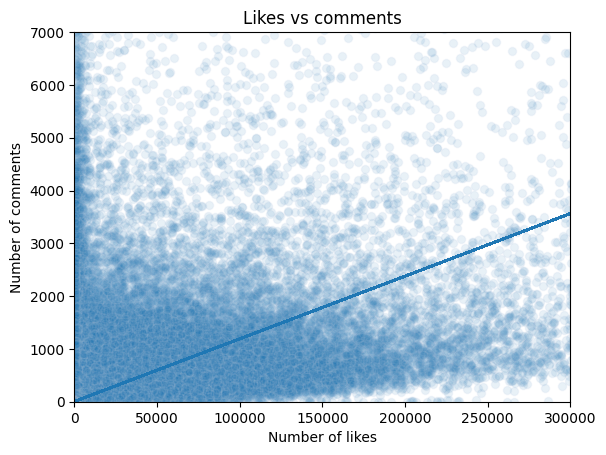

In [ ]:
from matplotlib.pyplot import xlabel, ylabel

# We want to draw a scatter plot of number of likes vs number of comments:
plt.xlim(0,300000)
plt.ylim(0,7000)
plt.scatter(posts['numbr_likes'], posts['number_comments'], alpha=0.1, edgecolors = 'lightsteelblue')
xlabel('Number of likes')
ylabel('Number of comments')
plt.title('Likes vs comments')

# Problem: we have too many points! We cannot really say anything about the association between the two variables.
# So we can draw the best fit line to obtain some additional info...

slope, intercept = np.polyfit(posts['numbr_likes'], posts['number_comments'], 1)
plt.plot(posts['numbr_likes'], slope*posts['numbr_likes']+intercept) 

It seems there is some positive correlation... but we can say nothing about the significance! It may have arised from some kind of sampling error...
We have to test this linear relationship. We can do this using the Pearson Correlation Coefficient. We run the following test:

- Null Hypothesis --> H0 --> Pearson coefficient 'rho' == 0 

- Alternative Hypothesis --> H1 --> rho != 0 

In [ ]:
from scipy import stats

# Let's calculate correlation coefficient and p-value between number of likes and number of comments:
rho = stats.pearsonr(posts['numbr_likes'], posts['number_comments'])
r = rho[0]

What do we expect? From the plot shown above, is clear that there is some linear relationship... so we expect to see a positive rho that is not too high.
At the same time we know that our sample size is very big... it is almost an asymptotic! So we expect to see a p-value really really low...

In [ ]:
p_value = rho[1]

# And in fact:

print('The Pearson correlation coefficient is', round(r, 3))
print('The corrisponding p-value is', p_value)

The Pearson correlation coefficient is 0.374
The corrisponding p-value is 0.0


Since the p-value is really small, the test is significant and we can reject the Null Hypothesis H0. We can therefore conclude that there is a linear association between the number of likes and the number of comments. However, the value of rho is strongly influenced by the presence of (a lot of) posts with few likes but a lot of comments. 

But why we were so confident about our p-value's claims?
There are two reason. 

- The first one is strictly mathematical: the p-value depends on the sample size. So when N increases, p decreases.
- The second one is purely logical: we know that the larger the sample size, the weaker the impact of random errors on our estimate.

### RQ8.2

In [ ]:
columns = ['cts', 'numbr_likes', 'post_id', 'number_comments']
posts = posts_csv[:, columns].to_pandas().dropna()

First thing to do is extracting a random sample. Since we have 40+ millions of observations, let's take a very large sample:

In [ ]:
import random

id_post = list(posts['post_id'])
random_sample_id = random.sample(id_post, 5000000)

random_sample_posts = posts[posts['post_id'].isin(random_sample_id)].reset_index(drop=True)

Now let's define a function that classifies the posts based on the time they were published. We will do it following the steps Prof. Ioannis did in class, but for semplicity we will consider just 4 'slots':

In [ ]:
# Classifying based on the hour:

random_sample_posts.cts = pd.to_datetime(random_sample_posts.cts)
random_sample_posts['hour'] = random_sample_posts.cts.dt.hour

slots = [(0, 4), (5, 11), (12, 18), (19, 24)]  # 'slots' of hour... as we did in class 

def check_time(hour):
    for slot in slots:
        if hour >= slot[0] and hour <= slot[1]:
            return slots.index(slot)+1    

In [ ]:
# Now we add the variable 'slot' to our 'little' dataset:

random_sample_posts['slot'] = random_sample_posts.hour.apply(lambda row:check_time(row))  # new variables with the 'slot' hour

It's time to see if there is any difference in the number of likes a user receives if he posts in different ours.
We can use the following command to have a quick look:

In [ ]:
import researchpy as rp

rp.summary_cont(random_sample_posts['numbr_likes'].groupby(random_sample_posts['slot']))

,N,Mean,SD,SE,95% Conf.,Interval
slot,,,,,,
1,770996,254.9571,4201.5044,4.7850,245.5788,264.3355
2,1068588,273.3504,5795.1634,5.6061,262.3627,284.3382
3,1823325,303.4727,8241.1138,6.1031,291.5107,315.4346
4,1337091,281.2885,6434.6759,5.5648,270.3818,292.1952


Just looking at the table, we notice that there are some differences in the verage number of likes, therefore we would be led to conclude that the time in which users post affects the number of likes, but.... 

... the problem is that we cannot conclude anything! We need to be more rigorous and run a statistical test to compare the different groups.

The typical test when we want to compare the meaf of 2+ groups is the ANOVA test.
ANOVA relies on the following assumptions:
- Random sampling --> Check
- Omoschedasticity --> Check
- Normality --> NOT Check!

In fact, the distribution of likes is very skewed, so we can't say that residuals or observations are normally distributed.
ANOVA is typically 'resistant' to the hypothesis of normality, in the sense that a small deviation from this assumption is allowed, but in this case we are very distant. 
The solution is to proceed with a non-parametric test (which is not based on the assumption of normality as ANOVA does).
A possibility is the Kruskal Wallis Test, that compares the medians of 2+ populations instead of the mean and that does not require normality.

First, let's see if the median seem similar in our groups:

{'whiskers': [<matplotlib.lines.Line2D at 0x299ebec20>,
 'caps': [<matplotlib.lines.Line2D at 0x299ebf160>,
 'boxes': [<matplotlib.lines.Line2D at 0x299ebe980>,
 'medians': [<matplotlib.lines.Line2D at 0x2a7dc5390>,
 'fliers': [],
 'means': []}

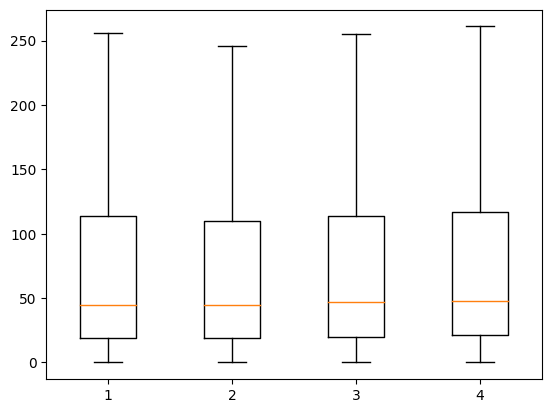

In [ ]:
likes_df = pd.DataFrame({'likes':random_sample_posts['numbr_likes'], 'slot':random_sample_posts['slot']})
groups = likes_df.groupby('slot').groups

slot_1 = likes_df.loc[groups[1]]['likes']
slot_2 = likes_df.loc[groups[2]]['likes']
slot_3 = likes_df.loc[groups[3]]['likes']
slot_4 = likes_df.loc[groups[4]]['likes']


plt.boxplot([slot_1, slot_2, slot_3, slot_4], showfliers= False)

This time htey look very similar. And in fact:

In [ ]:
# Numerically:
print('Median for group 1:', np.median(slot_1))
print('Median for group 2:', np.median(slot_2))
print('Median for group 3:', np.median(slot_3))
print('Median for group 4:', np.median(slot_4))

# So they are very close to each oter.

Median for group 1: 45.0
Median for group 2: 45.0
Median for group 3: 47.0
Median for group 4: 48.0


In [ ]:
# But if we try to test:
print(scipy.stats.mannwhitneyu(slot_1, slot_2))
print(scipy.stats.mannwhitneyu(slot_1, slot_3))
print(scipy.stats.mannwhitneyu(slot_1, slot_4))
print(scipy.stats.mannwhitneyu(slot_2, slot_3))
print(scipy.stats.mannwhitneyu(slot_2, slot_4))
print(scipy.stats.mannwhitneyu(slot_3, slot_4))

MannwhitneyuResult(statistic=414538202436.0, pvalue=2.567749287975227e-13)
MannwhitneyuResult(statistic=693343646941.5, pvalue=3.710590788560954e-67)
MannwhitneyuResult(statistic=504382656087.0, pvalue=5.236057499857218e-149)
MannwhitneyuResult(statistic=954603885730.0, pvalue=9.902547437596042e-180)
MannwhitneyuResult(statistic=694274597643.5, pvalue=1.816730326035133e-309)
MannwhitneyuResult(statistic=1209113524703.0, pvalue=8.182541828686181e-35)


A very high H statistic ad a p-value of zero! We should reject the null hypothesis and conclude that medians are different, also when they are the same?
It seems a paradox, but we can try to give an explanation...

1) Mann–Whitney test doesn't only focus on the median value, but on the DISTRIBUTION around that value. So, even if two groups have the same median, they may have different distributions around it. Furthermore, when we work with very large samples our test become more precise, and this means that even a small difference is detected: this is reflected in a large decrease in the p-value.
2) In this case, the problem of 'statistical significance' vs 'practical significant' arises.

A we said, when we deal with lot of observations, also a tiny difference between two values can become STATISTICALLY significant. But statistically significant does not mean PRATICALLY significant. In other words, big-size sample make the p-value go down very easily, but the Data Scientist must have the sensibility to understand if its value is due to either an actual difference or a simple issue of the size of the dataset.

So the answer to RQ8.2 is: if we talk about 'statistically-significant differences', yes, thery are different.

But if we speak in practical terms, knowing that we are dealing with millions and millions of observations and also remembering that the p-value is affected by the sample size, then we can conclude that there are no differences between the groups.

And the same goes for comments:

Median for group 1: 2.0
Median for group 2: 1.0
Median for group 3: 2.0
Median for group 4: 2.0


{'whiskers': [<matplotlib.lines.Line2D at 0x289f500d0>,
 'caps': [<matplotlib.lines.Line2D at 0x289f504f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x289f50fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x289e7cb50>,
 'fliers': [],
 'means': []}

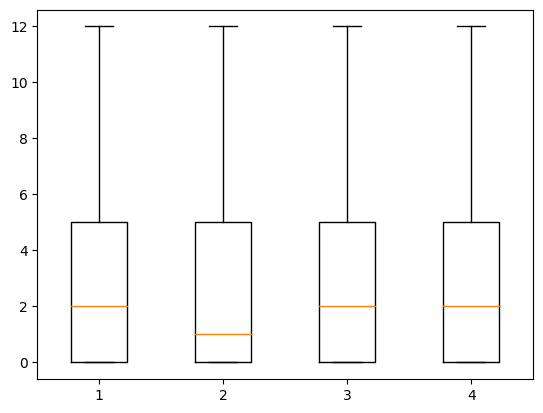

In [ ]:
# Comments

comments_df = pd.DataFrame({'comments':random_sample_posts['number_comments'], 'slot':random_sample_posts['slot']})
groups_comments = comments_df.groupby('slot').groups

slot_1_2 = comments_df.loc[groups_comments[1]]['comments']
slot_2_2 = comments_df.loc[groups_comments[2]]['comments']
slot_3_2 = comments_df.loc[groups_comments[3]]['comments']
slot_4_2 = comments_df.loc[groups_comments[4]]['comments']

print('Median for group 1:', np.median(slot_1_2))
print('Median for group 2:', np.median(slot_2_2))
print('Median for group 3:', np.median(slot_3_2))
print('Median for group 4:', np.median(slot_4_2))


plt.boxplot([slot_1_2, slot_2_2, slot_3_2, slot_4_2], showfliers= False)

The distribution is very similar. So, practically speaking, there is no difference!

### RQ8.3

What is the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [ ]:
columns2 = ['followers']  # we need just one column
profiles = profiles_csv[:, columns2]

profiles = profiles.to_pandas().dropna()

We can use the histogram to plot the distribution of followers. We add the density line to have a more effective representation.

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_12474/1534723224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(profiles['followers'], hist=False, kde=True,


<AxesSubplot: xlabel='followers', ylabel='Density'>

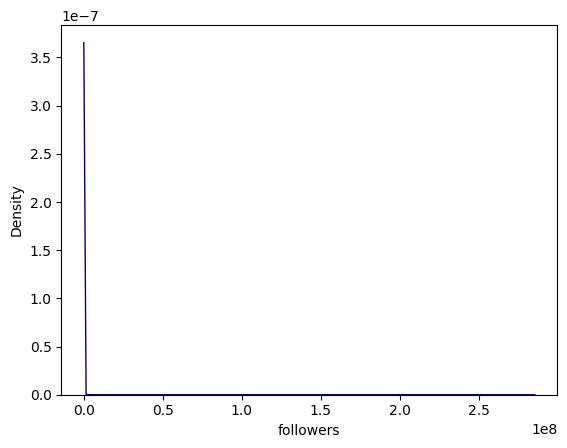

In [ ]:
sns.distplot(profiles['followers'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

But again, like in the RQ1, this is not the most effective way to do that.

In fact, the very majority of users have few followers, but there are also some very popular profiles with thousands and thousands, and possibly millions of followers.
In fact, if we have a closer look we can see that 

In [ ]:
print('The maximum number of followers in our dataset is:', np.max(profiles))
print('The minimum number of followers in our dataset is:', np.min(profiles))

The maximum number of followers in our dataset is: followers    285457645.0
dtype: float64
The minimum number of followers in our dataset is: followers    0.0
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Also, we can extract some summaries such as the mean and the quantiles:

In [ ]:
print('The average is:', round(np.mean(profiles))) # Very low, compared to the maximum

The average is: followers    4740.0
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
print('25th, 50th (median), 75th quantiles', np.quantile(profiles, 0.25), np.quantile(profiles, 0.5), np.quantile(profiles, 0.75))

# This is the point!
print('')
print('The average is', round(np.mean(profiles)), 'but the median is', np.quantile(profiles, 0.5)) # !

# If we look at the 90th percentile:
print('')
print('The 90th percentile is:', round(np.quantile(profiles, 0.90))) # !!!

25th, 50th (median), 75th quantiles 159.0 406.0 974.0

The average is followers    4740.0
dtype: float64 but the median is 406.0

The 90th percentile is: 2502


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


This means that more than 90% of the profiles in the dataset have less than 2500 followers... while the average number was 4740!
Why? Because the mean is not robust to outliers! An alternative summary is the median.

Below we show the greater robustness of the median compared to the mean.

For example, if we focus on the first 90% of the dataset:

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_12474/1745916612.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ok_followers, hist=True, kde=True,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


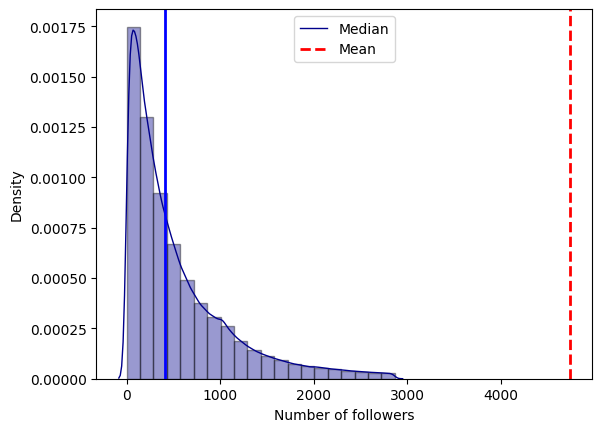

In [ ]:
ok_followers = profiles[profiles <= round(np.quantile(profiles, 0.91))]

# If we try to represent them:
sns.distplot(ok_followers, hist=True, kde=True, 
             bins = 20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
xlabel('Number of followers')  

# But look where the total average is:             
average = int(np.mean(profiles))
plt.axvline(average, color='red', linestyle='dashed', linewidth= 2)

# Now it is very evident the way in which outliers are 'pulling-up' the mean (red line)!

# If we plot the median (blue line) we can see that it is way more representative than the average in this case
median = np.quantile(profiles, 0.5)
plt.axvline(median, color='blue', linewidth=2)

plt.gca().legend(('Median','Mean'))

Final reflection and considerations

When we notice the presence of ouliers, a common approach is to delete them.
In this case, we can't do that. That's because the distribution of followers on social media follows a Pareto-look-alike distribution: deleting the outliers would be like totally changing the reality!
In this case, in fact, they are not due to measurement or transcription errors: they simply reflect the reality of social networks, where the 80-20 rule is an ever-present constant.
So, instead of eliminating ouliers, we can simply focus on the majority of the cases.

### RQ8.4

In statistical analysis, plotting the data by choosing the most appropriate representation is a crucial step.
We know we can divide data in two macro-groups: numerical data (discrete and continous) and categorical data. 

When we are working with continuous data, we may want to break them in 'categories' or intervals, for example when we deal with big datasets. This allows us to count how many observations fall inside each interval (or, same thing, we can count the frequency of data that fall in these intervals). The graphical representation that does this is called a histogram. For example, histograms can be used to plot the distribution of heights of children, or to represent the distribution of grades in an exam...

Visually, histograms are very similar to bar plots. However there is a big difference between these two: in barplots, we are working with categorical data.
While in histograms the x axis hosted the continous variable, in the bar chart it serves to list the categories, in correspondence of which the vertical bar indicates the relative frequency (or absolute number) of occurrences.
We can use barplots for represent how many people live in urban areas vs rural reas, or to plot the number of contagions of a disease in the different months.

The bar plot, however, is not very illustrative when there is a total (a very common case is when we work with percentages) to be distributed over the various categories. To stress the fact that the sum of the occurrences is one, the bar plot is therefore replaced by the pie plot, which basically summarizes the same information. For example, pie charts are used for describing the percentage of students attending a certain class divided in males and females, or to illustrate which countries are most responsible of CO2 emissions.

We also have graphs that allow the comparison between two numerical variables: that's the case of scatter plots, that we used in question RQ8.1, which are widely used to visualize correlation of any type, not only linear. For example, scatter plots are use to check the presence of relationships between the height and the weight, or between the extension in m2 of a house and its market value.


### RQ8.5

Finally, we have boxplots. Boxplots are quite similar to histograms, in the sense that both are used to visualize the distribution of a certain numerical variable. The boxplot, however, has the advantage to incorporate information regarding the percentiles of the distribution and the presence of outliers, and allows to compare different groups of observations better than an histogram, as we did, for example, in RQ8.2.

The shape of the 'box', infact, is built in such a way that the line in the center is the median, that is, the value that 'cuts in two' the distribution, while the 'extremes' of the rectangle indicate the first and third quartiles (or the 25th and 75th percentile). The two segments that come out from the box are limited by the the minimum and the maximum.  

Beyond the segments, outliers are represented as points. Sometimes, it is useful to remove outliers to give a cleaner representation.

In [ ]:
################################################################################################################################

# BONUS POINTS

### Bonus Point a.

First, we define the dataset on which we want to work on:

In [ ]:
# Profiles
columns2 = ['profile_id', 'followers']
profiles = profiles_csv[:, columns2].to_pandas()

profiles = profiles[profiles["followers"].notna()]

In [ ]:
# Posts
columns = ['profile_id', 'cts']
posts_bonus = posts_csv[:, columns].to_pandas().dropna()

Then, we set the treshold that will split the dataset into two groups

In [ ]:
treshold = round(np.quantile(profiles['followers'], 0.90))

We create two datasets:

In [ ]:
top_10 = profiles[profiles['followers'] >= treshold]   # for very popular profiles
bottom_90 = profiles[profiles['followers'] < treshold] # for users with less followers

print(len(top_10)/len(profiles))  # as we expected...

0.10002922290531287


Now that we have divided profiles in two parts, what we need to do is to separate the posts apparteining to the 2 subsets:

In [ ]:
top_10_posts = pd.merge(posts_bonus, top_10, on = "profile_id")
bottom_90_posts = pd.merge(posts_bonus, bottom_90, on = "profile_id")

Finally, we can use a similar code from RQ6 to compute our means:

In [ ]:
# Bottom 90%:
bottom_90_posts["_previous_time"] = ( 
    bottom_90_posts.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

bottom_90_posts["_count_cts"] = bottom_90_posts.groupby("profile_id")["cts"].transform("count")
post_dt_by_profile_id = bottom_90_posts[bottom_90_posts["_count_cts"] > 1].reset_index()
bottom_90_posts["delta_time"] = bottom_90_posts["cts"] - bottom_90_posts["_previous_time"] 

new_bottom_90 = bottom_90_posts[['profile_id','delta_time']]
new_bottom_90 = new_bottom_90[new_bottom_90["delta_time"].notna()]

new_bottom_90_mean = new_bottom_90 \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

In [ ]:
# Top 10%:
top_10_posts["_previous_time"] = ( 
    top_10_posts.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

top_10_posts["_count_cts"] = top_10_posts.groupby("profile_id")["cts"].transform("count")
post_dt_by_profile_id = top_10_posts[top_10_posts["_count_cts"] > 1].reset_index()
top_10_posts["delta_time"] = top_10_posts["cts"] - top_10_posts["_previous_time"] 

new_top_10 = top_10_posts[['profile_id','delta_time']]
new_top_10 = new_top_10[new_top_10["delta_time"].notna()]

new_top_10_mean = new_top_10 \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

And now we can compute the average time interval between posts for the two groups:

In [ ]:
print('The average time for the top 10% users with more followers is', np.mean(new_top_10_mean))
print('The average time for the rest is', np.mean(new_bottom_90_mean))

The average time for the top 10% users with more followers is profile_id             2007393800.188173
mean          28 days 17:32:46.147065806
dtype: object
The average time for the rest is profile_id             3477889957.771525
mean          23 days 17:58:51.851115172
dtype: object


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Bonus Point b.

In [ ]:
# NOTE:
# We assume that the question is asking:
# "Are there (DIFERENT) users that have visited the same location on the same day? How about the same week?"

# We also did the math for the question:
# "Are there users that have visited the same location (more than two times) the same day/week?"
# We will report the results below.

In [ ]:
columns = ['profile_id', 'location_id', 'cts']
posts = posts_csv[:, columns].to_pandas().dropna()

First thing to do is converting cts in a datetime format:

In [ ]:
posts.cts = pd.to_datetime(posts.cts) # converting in datetime format

posts['date'] = posts.cts.dt.date # We create a new variable 'date' that only refers to year-month-day, and not to hours-minutes-seconds

We group by date and location. Then, we look at the unique values of profile_id who visited that location on that particular day.

If the number of unique users is = 1, it means that no (different) users visited that location in the same day.
Otherwise, if this number is > 1, some users were in the same place on the same date.

In [ ]:
posts_groups = posts.groupby(['date', 'location_id'])['profile_id'].nunique()

We can count the absolute number or refer to frequencies. We prefer this second option:

In [ ]:
ratio = round(len(posts_groups[posts_groups > 1]) / len(posts_groups),3)

print('In about', ratio*100, '% of the cases, different users visited the same place in the same day')

In about 16.7 % of the cases, different users visited the same place in the same day


Now we have to do the same thing, not with the day but with the week.
We assume that a week goes from Monday to Sunday.

NOTE: a different approach could be to consider a week as the range [day, day+7] or [day-7, day], but this is totally arbitrary and can lead to errors.

In [ ]:
posts['week'] = posts.cts.dt.isocalendar().week

posts_groups_week = posts.groupby(['week', 'location_id'])['profile_id'].nunique()
posts_groups_week

week  location_id 
1     1.200000e+02    1
      1.410000e+02    3
      2.060000e+02    1
      3.430000e+02    2
      3.890000e+02    1
                     ..
53    2.265224e+15    1
      2.335185e+15    1
      2.346459e+15    2
      2.355736e+15    1
      2.627658e+15    1
Name: profile_id, Length: 11441358, dtype: int64

And obviously, we expect to see an higher frequency:

In [ ]:
ratio_week = round(len(posts_groups_week[posts_groups_week > 1]) / len(posts_groups_week),3)

print('In about', ratio_week*100, '% of the cases, different users visited the same place in the same week')

In about 32.6 % of the cases, different users visited the same place in the same week


### Bonus Point c.

NOTE: we only consider the first 15 millions rows

In [ ]:
posts_descr = dt.fread('/Users/simonefacchiano/Desktop/Data Science/ADM/HW2-Instagram/instagram_posts.csv', max_nrows = 15000000)
descr = posts_descr['description'].to_pandas().dropna()

First, we define a function 'descriptions_to_dictionary' that adds every word of a single description into a dictionary 'd'

In [ ]:
d = {}

def descriptions_to_dictionary(description):
    
    for word in description.split():
        if (not word.isalpha()):
            description = description.replace(word, '')

    for word in description.split():
        if word in d:
            d[word] += 1
        else:
            d[word] = 1    
    #return(dict(sorted(d.items(), key=lambda x:x[1], reverse=True)))  # remove the comment!!!

#frase_prova = 'Questa frase è solo una prova , prendila come una prova !😎'
#print(descriptions_to_dictionary(frase_prova)) # --> works

Second, we apply this function to each row:

In [ ]:
descr['description'].apply(descriptions_to_dictionary); # we put ; to not show the output

Now we have the dictionary:

In [ ]:
d = dict(sorted(d.items(), key=lambda x:x[1], reverse=True))
d

{'the': 4617247,
 'to': 3529575,
 'and': 3364083,
 'a': 3282212,
 'и': 3195152,
 'в': 2604290,
 'of': 2294590,
 'in': 2052871,
 'for': 1847112,
 'I': 1713748,
 'на': 1464590,
 'you': 1447071,
 'with': 1360426,
 'не': 1285421,
 'my': 1277332,
 'is': 1239881,
 'с': 1094004,
 'on': 1041996,
 'de': 1006614,
 'this': 998796,
 'at': 959384,
 'что': 763039,
 'it': 665317,
 'your': 660245,
 'that': 632047,
 'our': 622339,
 'be': 619898,
 'me': 612330,
 'was': 609171,
 'по': 588810,
 'from': 575990,
 'are': 573152,
 'so': 559066,
 'я': 553730,
 'have': 540294,
 'для': 535945,
 'we': 531326,
 'all': 529967,
 'это': 485206,
 'The': 476394,
 'by': 462876,
 'but': 427625,
 'que': 425790,
 'как': 423592,
 'as': 419439,
 'от': 400730,
 'out': 397438,
 'la': 397338,
 'за': 381673,
 'love': 373210,
 'а': 364299,
 'up': 358545,
 'day': 355251,
 'e': 341914,
 'из': 338606,
 'у': 333633,
 'time': 328887,
 'к': 325343,
 'one': 323950,
 'или': 322095,
 'an': 321096,
 'do': 316091,
 'все': 316065,
 'en': 315

The problem is that we have to clean it!

In fact the most common words are like 'the', 'a', 'for' ecc ecc...

These are examples of STOPWORDS! Since we are doing Text Mining, we want to eliminate them because they have no use for what we are doing. For eliminating them, we need to install a package:

In [ ]:
pip install nltk

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


Furthermore, we may also want to eliminate non-english words. We can do it using stopwords[list of languages]

In [ ]:
clean_d = {key : d[key] for key in d if key not in stopwords.words(['english', 'russian']) and len(str(key))>3}

Now we want to plot the most common words.

The easiest way is to select the first k most common words in our dictionary and plot them using a bar-plot. This works well when we are interested in a 'small' k, but when we are looking for the, for example, 200 most common words, bar plot gets confusing.

So, a better alternative is to use a Word Cloud. In a Word Cloud, we plot the most common words of a text (in this case, of multiple texts merged togheter) in a unique image, and the size of each word indicates its frequency.


In [ ]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 KB 2.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud ... done
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


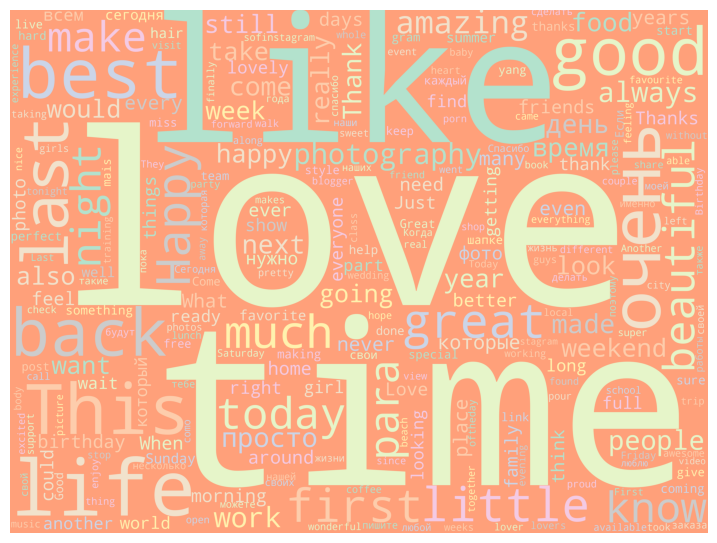

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color="lightsalmon",
    colormap = 'Pastel2',
    width = 4000,
    height = 3000,
    max_words = 250,
    relative_scaling=0.5
    ).generate_from_frequencies(clean_d)

plt.figure(figsize = (9, 9)) # bigger plot
plt.axis('off') # removing axis
plt.imshow(wc)

One thing that immediately catches the eye is that the words that appear most often are 'positive' words (love, like, good, best, amazing ...).
The study of texts (in this case, of post descriptions) which aims to extract information regarding the emotional sphere of the writer is called Sentiment Analysis.

# Command Line Question 

Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also does not use as much CPU processing time as other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly. 

In this question, you should use command line tools such as grep and possibly other commands to answer the following question: 
- Using the instagram_posts.csv, retrieve the first __ten posts__ with descriptions __longer than 100 characters__ and output the <ins>profiles that posted them</ins>. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output __User was not found!__ for those posts.)

__Note:__ You may work on this question <ins>in any environment</ins> (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in __CommandLine.sh__, which must be executable.


**I did the command line question in my Ec2 instance to work properly on all the file instagrmam_posts.csv**


**I used the following lines in the linux terminal to obatain the result asked in the question**


**The file containing the all profile_id corresponding to the profiles that published a post with a description longer than 100 characters is saved in a new .csv file (profile.csv) than i take the first ten rows of that file to obtain the final result which is printed on the terminal**

**Content of commandLine.sh**


1 awk 'length($8)>100{print($4)}' instagram_posts.csv > profile.csv


2 cat profile.csv | head -10


# Algorithmic Question
1. [**AQ1**] Given the following pseudocode, answer the questions: 

<pre>
Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)
</pre>
- What is the output of this algorithm? Describe the mechanism of the algorithm <ins>in detail </ins>. We __do not__ want to know only its final result. (Describe one example on your own)
- What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N? 
- Is this algorithm the __optimal__ one to produce this output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?


**Pyhton implementation of the algorithm**

In [ ]:
def f1(sequence,end):
    for i in range(end):
        print(sequence[i])
    print('\n')
def f2(sequence,start,end):
    if start == end :
        f1(sequence,end)
    else: 
        for i in range(start,end):
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence,start+1,end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            

**Example of execution**

In [ ]:
sequence = ['a','b','c']
N= 3

In [ ]:
f2(sequence,0,N)

a
b
c


a
c
b


b
a
c


b
c
a


c
b
a


c
a
b




**AQ1.1**

***The algorithm implements 1 recursive function f2 and 1 function f1 to print all the possible combination of a list of N characters.
At first the call f2(sequence,0,N) enters in the else block,because start(=0)!=end(=N), and inside the for loop, the for is blocked, beacuse f2(sequence,0+1,N) is called, and waits for the execution of this recursive call. f2(sequence,0+1,N) starts a recursive chain. 
This is create a n-ary tree of recursive calls, its leaves are the call to f1(sequence,N) function which
prints the sequence given as input.
The sequence is modified in the execution of this algorithm beacuse f2 does side-effect.***


**AQ1.2**


***To compute with the big-O notation the asymptotic i counted the number of recursive call made by  f2(sequece,0,N)***


$$
\begin{equation}
T(N) = N*T(N-1) + const
\end{equation}
$$
$$
\begin{equation}
T(0) = const
\end{equation}
$$
$$
\begin{equation}
T(N-1) = (N-1)*T(N-2) + const
\end{equation}
$$
$$
\begin{equation}
T(N) = N*(N-1)*T(N-2) + const*(N+1)
\end{equation}
$$
$$
\begin{equation}
T(N) = N*(N-1)*(N-2)*T(N-3) + N*(N-1)*const + (N+1)*const
\end{equation}
$$
$$
\begin{equation}
T(N) = N*(N-1)*(N-2)*....*2*1*T(0) + const*[1+N+N*(N-1)+N*(N-1)*(N-2)+...+N*(N-1)*(N-2)*...*4*3]
\end{equation}
$$
$$
\begin{equation}
T(N) = N! + (\sum_{k = 0}^{N-2} \frac {N!}{(N-K)!})
\end{equation}
$$

**T(N) IS O(N!)**

**AQ1.3**

***This algorithm is O(N!) which is optimal for the problem of printing all the possible combination of a list of N characters. This result match with the number of all the possible combinations of N elements which is N!.***

### [AQ2] Considering the following problem, answer the questions:

##### Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

##### Each piece of the cut should have an integer length
##### He should at least cut the ribbon once
##### The multiplication of the length of all the pieces be the maximum possible

#### 1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

##### ribbon_pieces is the recursive function that is going to be in charge of using max() to solve condition 3 of the problem statement.

##### max() funcion returns the item with the highest value of the multiplication of the parts.

##### The ribbon cannot be of negative length and cannot be less than 1 to meet conditions 1 and 2. This is why the first base case was made.

##### A for loop is set to iterate piece in the range of N (ribbon len). The range of the iteration is going to be from 1 to N-1 to be able to apply recursion without reaching N = 1. When N = 2, the only solution is to cut the ribbon into 2 parts (1 and 1) so it returns 1 and would be the second base case.

##### The ribbon begins to be cut in "piece" and the remainder of the ribbon is "N - piece". Recursion is performed in this second part of the ribbon to choose the maximum value that results from the multiplication of the cuts by doing comparisons. This result is saved in the variable "recursive_path". As the for loop progresses, the variable "ans_max" will choose between which multiplication is greater, if the one that is being done now or the one that was done in the previous iteration.


In [ ]:
def ribbon_pieces(N):

    ans_max = 1

    #Base cases:
    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
    
    #range from 1 to N: to be able to apply recursion without reaching N = 1.
    for piece in range(1, N-1):

        recursive_path = max(piece * (N-piece), piece * ribbon_pieces(N-piece))
        
        ans_max = max(ans_max, recursive_path)
    

    return ans_max

N= int(input().strip())

ribbon_pieces(N)

36

#### 2. Show that the algorithm has exponential running time.

##### To show that the time complexity of the algorithm is exponential, a recursion tree was made:

<img src= 'ADMHW2AQ2.png'>

##### This is the recursion tree of ribbon_pieces when N=7. 

#### Therefore, the time complexity if the algorithm is equal to: (The number of times the function is repeated was counted following the recursion tree)

$$ T(1) = 0 $$
$$ T(2) = T(1) + 1 = 1 $$
$$ T(3) = T(2) + 1 = 2 $$
$$ T(4) = T(3) + T(2) + 1 = 4 $$
$$ T(5) = T(4) + T(3) + T(2) + 1 = 8 $$
$$ T(6) = T(5) + T(4) + T(3) + T(2) + 1 = 16 $$
$$ T(7) = T(6) + T(5) + T(4) + T(3) + T(2) + 1 = 32 $$


$$ T(n) = \sum_{i=2}^{n-1} T(i) + 1 $$

$$ T(n) = 2^{n-2}  \ n>=2 $$

##### Math induction:



$$ T(2) = 2^{2-2} = 1 $$
$$ T(n) = 2^{n-2} $$
$$ T(n+1) = 2^{n+1-2} $$
$$ T(n+1) = \sum_{i=2}^{n+1-1} T(i) + 1 $$
$$ T(n+1) = T(n) + \sum_{i=2}^{n-1} T(i) + 1 $$
$$ T(n+1) = T(n) + T(n) $$
$$ T(n+1) = 2T(n) = 2(2^{n-2}) = 2^{n-1}



##### The result is that the time complexity has an exponencial running time: 
$$ 2^{n-1}

#### 3. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [ ]:
def ribbon_pieces_dynamic(N):

    #Base cases:
    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
    
    #list_ans will save all the results of the previous iterations
    list_ans = []

    for piece_len in range(0,N+1):
            
        a = 0
        list_ans.append(a)

    for piece_len in range(1,N+1):

        ans_max = 0
    
        for piece in range(1, piece_len):

             ans_max = max(ans_max, (list_ans[piece_len - piece]*piece))

             ans_max = max(ans_max, (piece_len - piece)*piece)

        list_ans[piece_len] = ans_max
    
    return list_ans[N]

N= int(input().strip())

ribbon_pieces_dynamic(N)

12

##### Since we are saving the values ​​of each traversal in the "list_ans" list, the time complexity would be as follows:

##### Without focusing on the for loop of the list, and only focusing on the double for, we get the execution time.

##### With N= 3, in the first for, the execution time would be:

$$ T(1) = 1 + 3(n+1) + 3n = 6n + 4 $$

##### The inner for execution time:

$$ T(2) = 1 + \frac{((n-1)*n)}{2} = \frac{(n^{2} - n + 2)}{2} $$

##### Total time execution:

$$ T(1) + T(2) = \frac{n^2 + 11n + 10}{2} $$

##### Therefore, the time complexity is:

$$ O(n^2)

#### 4. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [ ]:
import time

def f1(x):
    ## f1 is the recursion algorithm
    ans = ribbon_pieces(x)
    return ans

def f2(x):
    ## f2 is the dynamic solution
    ans = ribbon_pieces_dynamic(x)
    return ans

def timed(f):
    
    def wrapper(n):
        start_time = time.time()
        ret = f(n)
        elapsed_time = time.time() - start_time
        return elapsed_time, ret
    
    return wrapper

timed_f1 = timed(f1)

timed_f2 = timed(f2)

#timed_f2(10)


In [ ]:
import pandas as pd

result = pd.DataFrame([(*timed_f1(x), *timed_f2(x)) for x in range(2,26)], 
                        columns=["time_f1","result_f1","time_f2","result_f2"])

result.reset_index(inplace = True)

result

,index,time_f1,result_f1,time_f2,result_f2
0,0,0.000010,1,0.000002,1
1,1,0.000016,2,0.000004,2
2,2,0.000002,4,0.000005,4
3,3,0.000005,6,0.000007,6
4,4,0.000009,9,0.000009,9
5,5,0.000017,12,0.000011,12
6,6,0.000035,18,0.000015,18
7,7,0.000071,27,0.000018,27
8,8,0.000141,36,0.000022,36
9,9,0.000283,54,0.000025,54


<AxesSubplot:title={'center':'Execution time'}, xlabel='Ns', ylabel='Executon time'>

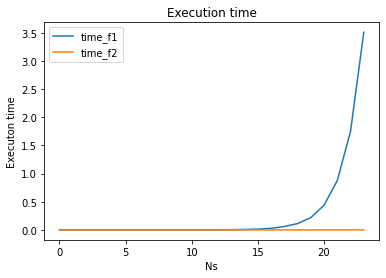

In [ ]:
result.plot.line(x='index', y=['time_f1','time_f2'], title='Execution time',
                    xlabel='Ns', ylabel='Executon time')

##### As evidenced in the line graph, when the execution time is exponential, as the number of iterations increases, the execution time increases exponentially. On the other hand, f_2, which was the polynomial solution, has a very small increase in execution time, so it will be more efficient. Likewise, as shown in the "result" DataFrame, the results of both implementations are the same, so it can be concluded that you should always try to get a solution that has a polynomial execution time, and not an exponential one so that the algorithm can be more efficient.

#### 5. (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

##### As we could see in the previous implementations, when the ribbon is cut into pieces of 3, we are going to get the largest multiplication number.

##### For example: N = 15

$$ \frac{15}{3} = 5 $$

##### Therefore, we have to do:

$$ 3^{5} $$

##### to get the largest product.

##### The problem is when N is not divisible by 3. So the last part of the ribbon must be left at 2 or 4. Therefore, the operation "N = N-3" is performed to cut the ribbon in 3 and the piece (initialized in 1) is multiplied by 3.
##### As N is greater, and can be divided into 3, piece = piece * 3 will carry out the multiplication of the pieces of len 3 that are cut.

In [ ]:
def ribbon_pieces__(N):

    piece = 1

    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
     
    if (N == 3):
        return 2
  
    while (N > 4):
        
        N = N - 3
        
        piece = piece * 3
        
     
    return (N * piece)
 
N= int(input().strip())

ribbon_pieces__(N)
     

59049